# CSMODEL Machine Project

This Jupyter notebook presents a comprehensive analysis of the [Family Income and Expenditure Survey 2012 Vol. 1](https://psada.psa.gov.ph/auth/register) dataset from the Philippine Statistics Authority (PSA).

The goal of the project is to explore how **socioeconomic and demographic factors** may be associated with the **expenditure patterns** of Filipino households in 2012.

**Research Question**
1. [How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?](#how-are-socioeconomic-and-demographic-factors-associated-with-the-expenditure-patterns-of-filipino-households-in-2012)

**Exploratory Data Analysis (EDA) Questions**
1. [How does the proportion of spending across **major expenditure categories** vary based on various **socioeconomic and demographic factors**?](#1-how-does-the-proportion-of-spending-across-major-expenditure-categories-vary-based-on-various-socioeconomic-and-demographic-factors)
2. [Which regions spend the highest proportion of their **food expenditure** on various **food categories**?](#2-which-regions-spend-the-highest-proportion-of-their-food-expenditure-on-various-food-categories)
3. [Is there a correlation between **total household income** and the proportion of food expenditure spent on **food consumed outside the home**?](#3-is-there-a-correlation-between-total-household-income-and-the-proportion-of-food-expenditure-spent-on-food-consumed-outside-the-home)
4. [Is there a correlation between **total household income** and any **major expenditure category**?](#4-is-there-a-correlation-between-total-household-income-and-any-major-expenditure-category)
5. [How does **housing expenditure** differ between **urban** and **rural** households?](#5-how-does-housing-expenditure-differ-between-urban-and-rural-households)

## Authors

The following students of De La Salle University - Manila, Philippines collaborated on this project:

<table>
  <thead>
    <tr>
      <th>Profile</th>
      <th>Author</th>
      <th>Contributions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">
        <img src="https://github.com/qu1r0ra.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Christian Joseph Bunyi</strong>
        <br />
        <a href="https://github.com/qu1r0ra">@qu1r0ra</a>
      </td>
      <td>
        <ul>
          <li>Created and maintained the GitHub repository and the Jupyter notebook</li>
          <li>Constructed the research question</li>
          <li>Constructed EDA questions 1, 2, and 3</li>
          <li>Performed data cleaning and preprocessing (Section II)</li>
          <li>Performed EDA on EDA questions 1, 3, and 4 (Section III)</li>
          <li>Wrote introductory and skeletal Markdown</li>
          <li>Performed K-means clustering (Section IV)</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/kelliekaw.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Kellie Kaw</strong>
        <br />
        <a href="https://github.com/kelliekaw">@kelliekaw</a>
      </td>
      <td>
        <ul>
          <li>Constructed EDA question 5</li>
          <li>Wrote structure of the data (Section I)</li>
          <li>Performed EDA on EDA questions 1 and 5 (Section III)</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/JohnathanTantanan.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Lance Xavier Lim</strong>
        <br />
        <a href="https://github.com/JohnathanTantanan">@JohnathanTantanan</a>
      </td>
      <td>
        <ul>
          <li>Constructed EDA question 4</li>
          <li>Performed data cleaning and preprocessing (Section II)</li>
          <li>Performed EDA on EDA question 4 (Section III)</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/jstnsy.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Justin John Abraham Sy</strong>
        <br />
        <a href="https://github.com/jstnsy">@jstnsy</a>
      </td>
      <td>
        <ul>
          <li>Wrote description of the data (Section I)</li>
          <li>Wrote data collection method of the data (Section I)</li>
          <li>Performed EDA on EDA question 2 (Section III)</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

## I. Dataset

### Description

For this machine project, we work with the Family Income and Expenditure Survey (FIES) 2012 Volume 1, published by the Philippine Statistics Authority (PSA). This nationally representative dataset contains detailed information on the expenditures of Filipino households across a wide range of categories such as food, housing, education, health, transportation, and more.

Each record in the dataset represents a household, with variables describing both their socioeconomic characteristics (e.g., income, region, household size, urban/rural classification) and itemized expenditure data. We're particularly interested in how these expenditure patterns relate to factors like income level, location, and household demographics.

By analyzing this dataset, we aim to uncover meaningful patterns in how Filipino families spent their money in 2012 and what these patterns may tell us about their socioeconomic realities.

### Data collection method

The FIES 2012 was conducted in two rounds: the first visit in July 2012, covering spending from January to June, and the second visit in January 2013, covering July to December. Each household was surveyed twice to account for seasonal variations in spending behavior, particularly for items like food and utilities.

The PSA used a stratified multi-stage cluster sampling method based on the 2003 Master Sample design. Households were randomly selected from Primary Sampling Units (PSUs), which were typically barangays or combinations of barangays. In total, around 50,000 households across all 17 regions of the Philippines were included in the sample.

The unit of analysis is the household, as defined by shared residence and common food consumption. While the survey was primarily answered by the household head, it is assumed to represent the expenditures of the entire household.

Because the dataset was designed for national policymaking, it includes survey weights to ensure results are representative of the entire Filipino population. We'll take these into account during analysis, especially when estimating proportions or making regional comparisons.

### Structure (Kellie)

The dataset we are working with is a structured dataset, with each row representing an observation and each column representing an attribute or feature.

The dataset contains **$40171$ observations** with **$119$ attributes**. The attributes are as following:

`W_REGN` indicates the **region** where the household is located.

`W_OID` refers to **other unique IDs**. These are provinces and districts in the Philippines.

`W_SHSN` is the **sample household serial number**, uniquely identifying each sampled household.

`W_HCN` is the **household control number**.

`URB` indicates whether the household is located in an **urban** or **rural** area.

`RSTR` denotes the **stratum** the household belongs to.

`PSU` represents the **PSU number**.

`BWEIGHT` refers to the **base weight**.

`RFACT` refers to the **final weight**.

`FSIZE` refers to the **family size** of the household.

`AGRI_SAL` is the household's **salaries/wages** from **agricultural activity**.

`NONAGRI_SAL` is the household's **salaries/wages** from **non-agricultural activity**.

`WAGES` is the household's **salaries/wages** from both **agricultural** and **non-agricultural activities**.

`NETSHARE` represents the **net share** of **crops, fruits and vegetables produced, fishing or livestock and poultry raised by other households**.

`CASH_ABROAD` represents the household's **cash receipts, supports, etc.** from **abroad**.

`CASH_DOMESTIC` represents the household's **cash receipts, supports, etc.** from **domsetic source**.

`RENTALS_REC` refers to the **rentals received** from non-agricultural land, buildings, spaces, or other properties.

`INTEREST` refers to the amount received, cash or in kind, **interest** from bank deposits and loans extended to other families.

`PENSION` refers to the amount received, cash or in kind, **pension and retirement, workmen's compensation, or social security benefits**.

`DIVIDENDS` refers to the amount received, cash or in kind, **dividend** from investments, such as stock, bonds, etc.

`OTHER_SOURCE` refers to the amount received, cash or in kind, from **other sources of income not elsewhere classified**, such as royalties and income of members below 10 years old.

`NET_RECEIPT` represents the **total net receipts** from family sustenance activity.

`REGFT` represents the total received as **gifts**.

`NET_CFG` refers to the **net income** from **crop farming and gardening**.

`NET_LPR` refers to the **net income** from **livestock and poultry raising**.

`NET_FISH` refers to the **net income** from **fishing**.

`NET_FOR` refers to the **net income** from **forestry and hunting**.

`NET_RET` refers to the **net income** from **wholesale and retail**.

`NET_MFG` refers to the **net income** from **manufacturing**.

`NET_COM` refers to the **net income** from **community, social, recreational, and personal services**.

`NET_TRANS` refers to the **net income** from **transportation, storage, and communication services**.

`NET_MIN` refers to the **net income** from **mining and quarrying**.

`NET_CONS` refers to the **net income** from **construction**.

`NET_NEC` refers to the **net income** from **entrpreneurial activities not elsewhere classified**.

`EAINC` is the **total income** from **entrpreneurial activities**.

`TOINC` is the **total income**.

`LOSSES` represents the **losses** from **entrepreneurial activities**.

`T_BREAD` refers to the **total food expenditure** for **bread and cereals**.

`T_MEAT` refers to the **total food expenditure** for **meat**.

`T_FISH` refers to the **total food expenditure** for **fish and seafood**.

`T_MILK` refers to the **total food expenditure** for **milk, cheese, and eggs**.

`T_OIL` refers to the **total food expenditure** for **oil and fats**.

`T_FRUIT` refers to the **total food expenditure** for **fruits**.

`T_VEG` refers to the **total food expenditure** for **vegetables**.

`T_SUGAR` refers to the **total food expenditure** for **sugar, jam, honey, chocolate, and confectionery**.

`T_FOOD_NEC` refers to the **total food expenditure** for **other food not elsewhere classified**.

`T_COFFEE` refers to the **total food expenditure** for **coffee, cocoa, and tea**.

`T_MINERAL` refers to the **total food expenditure** for **mineral water, soft drinks, fruit juices, and vegetable juices**.

`T_ALCOHOL` refers to the **total food expenditure** for **alcoholic beverages**.

`T_TOBACCO` refers to the **total food expenditure** for **tobacco**.

`T_OTHER_VEG` refers to the **total food expenditure** for **other vegetable-based products**.

`T_FOOD_HOME` refers to the **total food expenditure** for food **consumed at home**.

`T_FOOD_OUTSIDE` refers to the **total food expenditure** for food regularly **consumed outside of home**, i.e., in restaurants, cafes, and canteens.

`T_FOOD` refers to the **total food expenditure**

`T_CLOTH` refers to the **total expenditure** for **clothing and footwear**.

`T_FURNISHING` refers to the **total expenditure** for **furnishings, household equipment, and routine household maintenance**.

`T_HEALTH` refers to the **total expenditure** for **medical products** such as medicines, appliances, and equipment, or any outpatient and inpatient **medical services**.

`T_HOUSING_WATER` refers to the **total expenditure** for **housing, water, electricity, gas, and other fuels**.

`T_ACTRENT` represents the **actual house rent**. It is the actual payment for the house or lot.

`T_RENTVAL` is the house rent or **rental value**.

`T_IMPUTED_RENT` is the **imputed house rental value**

`T_BIMPUTED_RENT` is the **imputed housing benefit rental value**

`T_TRANSPORT` refers to the **total expenditure** for **transportation**. This includes purchase of vehicles, operation, maintenance, and repair of personal transport equipment, and services.

`T_COMMUNICATION` refers to the **total expenditure** for **communication**.

`T_RECREATION` refers to the **total expenditure** for **recreation**. This includes all expenses incurred in acquiring equipment or items.

`T_EDUCATION` refers to the **total expenditure** for **education**. This includes tuition, allowances, and other school fees and contribution.

`T_MISCELLANEOUS` refers to the **total expenditure** for **miscellaneous goods and services** during the past month. This includes salons, barbershops, products for personal hygiene, and beauty products.

`T_OTHER EXPENDITURE` refers to the **total other expenditure**. This includes premiums for insurance, interest payments, losses due to fire or theft, and legal and membership fees.

`T_OTHER_DISIMBURSEMENT` refers to the **total other disimbursements**. This refers to non-family expenditures, including purchase or amortization of real property, payments of cash loan, installments for appliances or personal transport before 2012, loans granted to persons outside the household, amount deposited in banks or investments, and major repair or construction of a house.

`T_NFOOD` refers to the **total non-food expenditure**.

`T_TOTEX` represents the **total expenditure**.

`T_TOTDIS` represents the **total disimbursements**.

`T_OTHREC` refers to the **total other receipts**. These are non-income receipts including the value at cost of real and personal property sold, loands from outside the household, payments for loands granted to others, and withdrawals from savings or business equity. Also included are profits from sale of stocks and bonds, back pay and proceeds from insurance, net winnings from gambling, sweepstakes and lotteries, and inheritance.

`T_TOREC` refers to the **total receipts**.

`FOOD_ACCOM_SRVC` represents the **accomodation services**.

`SEX` is the household head's **sex**.

`AGE` is the household head's **age**.

`MS` is the household head's **marital status**.

`HGC` is the household head's **highest grade completed**.

`JOB` is the household head's **job or business indicator** during the past six months.

`OCCUP` is the household head's **primary occupation** during the past six months.

`KB` is the household head's **kind of business or industry** during the past six months.

`CW` is the household head's **class of worker** during the past six months.

`HHTYPE` represents the **type of household**.

`MEMBERS` is the **number of family members**.

`AGELESS5` is the number of family members **below 5 years old**.

`AGE5_17` is the number of family members **between 5 to 17 years old**.

`EMPLOYED_PAY` is the number of family members **employed for pay** during the past six months.

`EMPLOYED_PROF` is the number of family members **employed for profit** during the past six months.

`SPOUSE_EMP` represents whether the spouse **has a job or business** during the past six months.

`BLDG_TYPE` refers to the **type of building** of the house.

`ROOF` refers to the **type of roof** of the house.

`WALLS` refers to the **type of walls** of the house.

`TENURE` refers to the **tenure status** of the housing unit and lot occupied by the family.

`HSE_ALTERTN` represents whether there were any **alterations or additions** to the house or other **major renovations** done during the past six months

`TOILET` represents the kind of **toilet facilities** used by the family in the house.

`ELECTRIC` represents the **electricity indicator** in the building or house.

`WATER` refers to the **main source of water supply** of the family.

`DISTANCE` is the **distance** of the house **from the water source**.

`RADIO_QTY` refers to the number of **radios**.

`TV_QTY` refers to the number of **TVs**.

`CD_QTY` refers to the number of **CDs / VCDs / DVDs**.

`STEREO_QTY` refers to the number of **component / stero sets**.

`REF_QTY` refers to the number of **refrigerators / freezers**.

`WASH_QTY` refers to the number of **washing machines**.

`AIRCON_QTY` refers to the number of **air conditioners**.

`CAR_QTY` refers to the number of **cars, jeeps, and vans**.

`LANDLINE_QTY` refers to the number of **landline / wireless telephones**.

`CELLPHONE_QTY` refers to the number of **cellular phones**.

`PC_QTY` refers to the number of **personal computers**.

`OVEN_QTY` refers to the number of **stoves with oven / gas range**.

`MOTOR_BANCA_QTY` refers to the number of **motorized boats**.

`MOTORCYCLE_QTY` refers to the number of **motorcycle / tricycles**.

`POP_ADJ` is the **population adjustment**.

`PCINC` represents the **per capita income**.

`NATPC` represents the **national per capita income decile**.

`NATDC` represents the **national income decile**.

`REGDC` represents the **regional income decile**.

`REGPC` represents the **regional per capita income decile**.

## II. Data Cleaning and Preprocessing

Now that we have a good understanding of the dataset and how it was collected, we can proceed with cleaning and preprocessing it.

Cleaning the data is crucial to avoid errors or unexpected results later on, which may result from data that is inconsistent, incorrect, missing, etc.

First, let us import all the Python libraries and modules which we will be using throughout the notebook.

In [418]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Next, we load the dataset from a `.csv` file. The **pandas** library is ideal for this as it optimized for handling tabular data like that from the survey.

In [419]:
df = pd.read_csv('data/FIES_PUF_2012_Vol_1.csv')

It's good practice to view high level information of a dataset when looking at it the first time. `df.info()` allows us to do so.

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


From `df.info()`, we learn that the dataset indeed contains $40171$ entries or rows or **observations** and $119$ columns or **attributes**.

We also learn that:
- $5$ attributes are of datatype float64
- $92$ attributes are of datatype int64
- $22$ attributes are of datatype object

It also helps looking at some sample observations to see how data is structured and encoded. `df.head()` allows us to do so.

In [421]:
df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


From `df.head()`, we learn that the dataset's attribute names follow some coding scheme which does not clearly convey their meaning. This is not a problem, as we can refer to the **metadata dictionary** provided along with the dataset. Short descriptions of each attribute can also be seen in [Section I](#structure-kellie).

---

Next, we will drop unnecessary attributes. This step is dependent on our [research question](#research-question) and [EDA questions](#eda-questions) as they determine which variables are needed and which ones are irrelevant given the scope our EDA.

>**Note:**
>Some authors used the [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler) extension in Visual Studio Code to make data viewing and cleaning easier.

Since we will not be focusing on specific sources of income, we can omit all of the columns that add up to **total income**. Certain demographics are outside the scope of our EDA questions. These include some ID numbers, height, weight, occupation, age, quantity of certain furniture, material of house, water source, and electricity source, among others. All of these columns are irrelevant to our study. As such, they will all be dropped as part of the data cleaning process.

In [422]:
# Drop columns: 'W_OID', 'W_SHSN' and 80 other columns
df = df.drop(columns=['W_OID', 'W_SHSN', 'W_HCN', 'RSTR', 'PSU', 'RFACT', 'BWEIGHT', 'FSIZE', 'AGRI_SAL', 'NONAGRI_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_LPR', 'NET_CFG', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_COM', 'NET_TRANS', 'NET_MIN', 'NET_CONS', 'NET_NEC', 'EAINC', 'LOSSES', 'T_OTHREC', 'T_TOREC', 'FOOD_ACCOM_SRVC', 'MS', 'OCCUP', 'KB', 'CW', 'HHTYPE', 'MEMBERS', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY', 'EMPLOYED_PROF', 'SPOUSE_EMP', 'BLDG_TYPE', 'ROOF', 'WALLS', 'HSE_ALTERTN', 'TOILET', 'ELECTRIC', 'WATER', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY', 'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY', 'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY', 'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY', 'POP_ADJ', 'PCINC', 'NATPC', 'REGDC', 'REGPC']);

Next, we will represent certain columns of data with their actual names as string values. `W_REGN` is of data type `int`, as regions are represented with their respective region numbers. However, region **4A** and **4B** are represented with the values **41** and **42**. We simply convert the data type of the column to `string` and change every instance of **41** and **42** with **4A** and **4B**, respectively. The columns `URB`, `SEX`, and `JOB` use binary data types to represent their values. We simply change their `int` values with their actual names as `string` values: **Urban/Rural, Male/Female, With Job/Business**, and **Without Job/Business**.

In [423]:

# Change column types
df = df.astype({
    'W_REGN': 'string',
    'URB': 'string',
    'SEX': 'string',
    'NATDC': 'string',
    'JOB': 'string'
})

# Changes in column 'W_REGN'
df.loc[df['W_REGN'].str.lower() == "41".lower(), 'W_REGN'] = "4A"
df.loc[df['W_REGN'].str.lower() == "42".lower(), 'W_REGN'] = "4B"

# Changes in column 'URB'
df.loc[df['URB'].str.lower() == "1".lower(), 'URB'] = "Urban"
df.loc[df['URB'].str.lower() == "2".lower(), 'URB'] = "Rural"

# Changes in column 'SEX'
df.loc[df['SEX'].str.lower() == "1".lower(), 'SEX'] = "Male"
df.loc[df['SEX'].str.lower() == "2".lower(), 'SEX'] = "Female"

# Changes in column 'JOB'
df.loc[df['JOB'].str.lower() == "1".lower(), 'JOB'] = "With Job/Business"
df.loc[df['JOB'].str.lower() == "2".lower(), 'JOB'] = "No Job/Business"

Data cleaning would not be complete without dropping dupicate rows. As such, we can quickly check and drop any duplicate rows.

In [424]:
df.duplicated().sum()       # Number of duplicate observations

0

Fortunately, we have no duplicate observations.

Null or missing values also have to be checked and dealt with accordingly.

In [425]:
num_na_per_attribute = df.isna().sum()
num_na_per_attribute = num_na_per_attribute.sort_values(ascending=False)

print(num_na_per_attribute)

W_REGN                  0
URB                     0
TOINC                   0
T_BREAD                 0
T_MEAT                  0
T_FISH                  0
T_MILK                  0
T_OIL                   0
T_FRUIT                 0
T_VEG                   0
T_SUGAR                 0
T_FOOD_NEC              0
T_COFFEE                0
T_MINERAL               0
T_ALCOHOL               0
T_TOBACCO               0
T_OTHER_VEG             0
T_FOOD_HOME             0
T_FOOD_OUTSIDE          0
T_FOOD                  0
T_CLOTH                 0
T_FURNISHING            0
T_HEALTH                0
T_HOUSING_WATER         0
T_ACTRENT               0
T_RENTVAL               0
T_IMPUTED_RENT          0
T_BIMPUTED_RENT         0
T_TRANSPORT             0
T_COMMUNICATION         0
T_RECREATION            0
T_EDUCATION             0
T_MISCELLANEOUS         0
T_OTHER_EXPENDITURE     0
T_OTHER_DISBURSEMENT    0
T_NFOOD                 0
T_TOTEX                 0
T_TOTDIS                0
SEX         

From this, we learn that the dataset **does not have any missing values**. We can also choose to leave values of 0 for various expenditure categories as it can be the case that the household does not spend any amount for a particular category. We can only trust that the figures provided by each household are accurate to a significant extent and that the values are encoded by PSA without error.

However, to check for *possible* outliers and to satisfy early curiosity, we shall take the liberty to check the distribution of each **atomic** numerical attribute. We won't check aggregate numerical attributes anymore on the assumption that they are summations of a set of atomic numerical attributes.

For this, we can create a **boxplot** for each attribute, as it is a convenient, summarized way of checking how a group of numerical data may be distributed. Moreover, since all attributes of interest fall within the same range [$0$ to $10^9$], we can group them together in the same graph to give us a high-level comparison of the distribution of various atomic expenditure categories.

Lastly, we will need to apply **log transformation** to the values due to their very wide range.

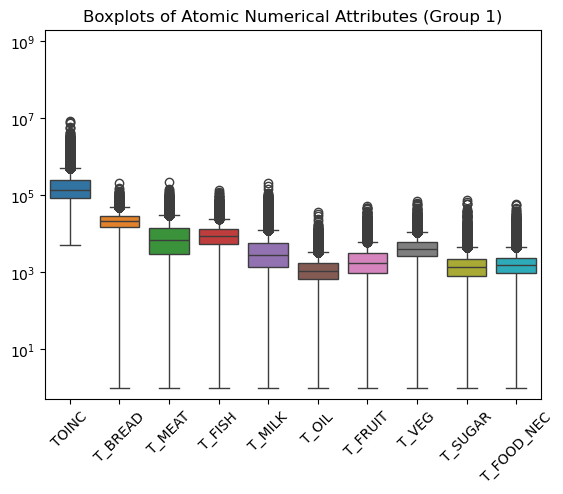

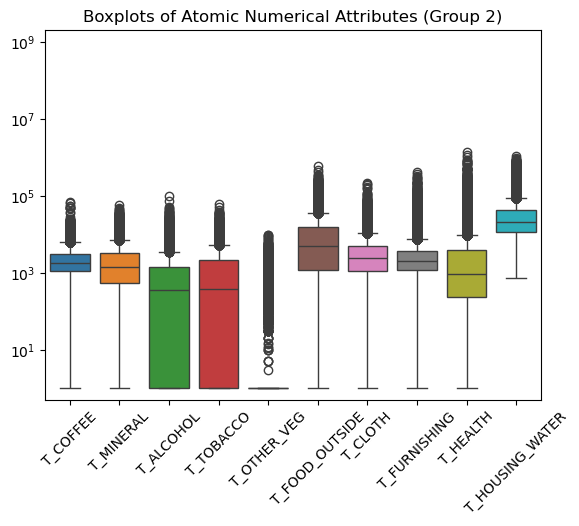

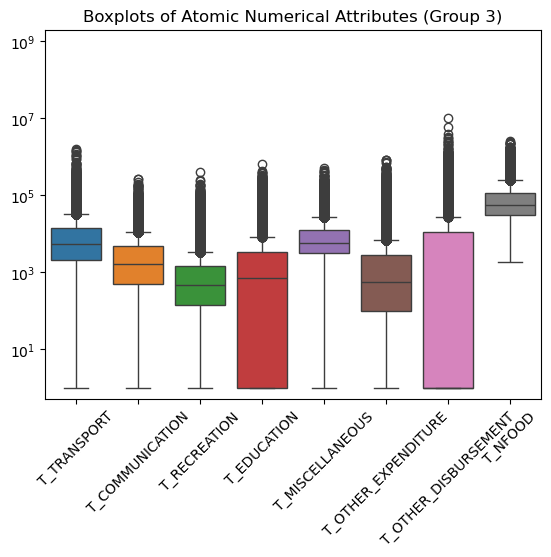

In [426]:
numerical_cols = [      # atomic numerical attributes of interest
    'TOINC', 'T_BREAD', 'T_MEAT', 'T_FISH', 'T_MILK',
    'T_OIL', 'T_FRUIT', 'T_VEG', 'T_SUGAR', 'T_FOOD_NEC',
    'T_COFFEE', 'T_MINERAL', 'T_ALCOHOL', 'T_TOBACCO', 'T_OTHER_VEG',
    'T_FOOD_OUTSIDE', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER',
    'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS',
    'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT', 'T_NFOOD'
]

GROUP_SIZE = 10     # number of attributes per plot

for i in range(0, len(numerical_cols), GROUP_SIZE):
    subset = numerical_cols[i:i+GROUP_SIZE]
    df_subset = df[subset].replace(0, 1)    # We replace 0s with 1s since 0 can't be viewed on a log transformation graph

    sns.boxplot(data=df_subset)
    plt.yscale("log")
    plt.ylim(1/2, 1e9 * 2)      # manually set the limit of the y-axis from slightly below 10^0 (or 1) to slightly above 10^9 (encoding limit)
    plt.xticks(rotation=45)
    plt.title(f"Boxplots of Atomic Numerical Attributes (Group {i//GROUP_SIZE + 1})")
    plt.show()



From these charts alone, we can already draw several insights about household expenditures (such as the first thing I noticed that somewhat surprised me, which is that **on average, a household in 2012 *may have* spent the most on the bread and cereals food category**, followed by **fish** then **meat**, both of which didn't even come close and were the food categories I expected instead to come out on top - CJ).

However, we only intend to check for possible outliers, so we shall not analyze any further. At first glance, it appears that there are lots of outliers for each atomic expenditure category, but that does not mean we can simply discard those observations. In fact, there isn't really any obvious 'extreme' outlier, as the outliers for each attribute are pretty spread out, hence the densely blackened areas. This *might* simply be indicative of a **significant disparity** in the higher expenditure amounts for each attribute.

Hence, we will not remove any observations and can reasonably conclude with the data cleaning process.

---

Now that we have cleaned the dataset, we can proceed to **preprocessing**, which entails applying necessary transformations (e.g., *feature engineering*, *encoding*, *normalization*, *standardization*) to prepare our data for [**exploratory data analysis (EDA)**](#iii-exploratory-data-analysis).

First, we will do **feature engineering**, which is the creation of new features (or attributes) based on existing ones.

We want to create the ff. attributes which we will use for EDA:

*Computed Attributes*
- **PROP_FOOD_OUTSIDE** = T_FOOD_OUTSIDE / TFOOD
- **T_VICES** = T_ALCOHOL + T_TOBACCO
- **T_HOME** = T_FURNISHING + T_HOUSING_WATER

*Binned Attributes*
- **AGE_GROUP**: age group of the head of the household, binned from AGE (age of the household head)
- **HGC**: binned from HGC (highest grade completed)

<br>

>**Note:**
>Technically, we can choose not to create new features and instead compute for said values on the fly as we need them (as pandas makes it easy to perform vectorized operations, anyways). However, creating new features based on values we may need in the future makes it easier for us long-term and saves time from having to recompute them, especially when they are needed in multiple instances.

In [427]:
# computed attributes
df['PROP_FOOD_OUTSIDE'] = df['T_FOOD_OUTSIDE'] / df['T_FOOD']
df['T_VICES'] = df['T_ALCOHOL'] + df['T_TOBACCO']
df['T_HOME'] = df['T_FURNISHING'] + df['T_HOUSING_WATER']

In [428]:
# binned attributes

### AGE_GROUP ###
age_bins = [0, 29, 39, 49, 59, 120]
age_labels = ['Under 30', '30–39', '40–49', '50–59', '60+']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)


### HGC (overwritten) ###
# The 'HGC - highest grade completed of the head of the family' codes are taken from the metadata dictionary.
def convert_hgc_code_to_string(code):
    exact_matches = {
        0: 'No Grade Completed',
        10: 'Preschool',
        280: 'Elementary Graduate',
        350: 'High School Graduate',
        900: 'Post Baccalaureate'
    }

    if code in exact_matches:
        return exact_matches[code]
    elif 210 <= code <= 260:
        return 'Elementary Undergraduate'
    elif 310 <= code <= 330:
        return 'High School Undergraduate'
    elif 410 <= code <= 420:
        return 'Post Secondary'
    elif 501 <= code <= 589:
        return 'Post Secondary / TechVoc Graduate'
    elif 810 <= code <= 840:
        return 'College Undergraduate'
    elif 601 <= code <= 689:
        return 'College Graduate'
    else:
        return 'N/A'

df['HGC'] = df['HGC'].apply(convert_hgc_code_to_string)

With all these changes, we may want to take another high-level view of our cleaned and preprocessed dataset.

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   W_REGN                40171 non-null  string  
 1   URB                   40171 non-null  string  
 2   TOINC                 40171 non-null  int64   
 3   T_BREAD               40171 non-null  int64   
 4   T_MEAT                40171 non-null  int64   
 5   T_FISH                40171 non-null  int64   
 6   T_MILK                40171 non-null  int64   
 7   T_OIL                 40171 non-null  int64   
 8   T_FRUIT               40171 non-null  int64   
 9   T_VEG                 40171 non-null  int64   
 10  T_SUGAR               40171 non-null  int64   
 11  T_FOOD_NEC            40171 non-null  int64   
 12  T_COFFEE              40171 non-null  int64   
 13  T_MINERAL             40171 non-null  int64   
 14  T_ALCOHOL             40171 non-null  int64   
 15  T_

In [430]:
df.head()

,W_REGN,URB,TOINC,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,...,SEX,AGE,HGC,JOB,TENURE,NATDC,PROP_FOOD_OUTSIDE,T_VICES,T_HOME,AGE_GROUP
0,14,Rural,325251,30263,29374,5204,3533,2136,2129,6517,...,Female,75,Elementary Graduate,No Job/Business,1,8,0.204017,0,58726,60+
1,14,Rural,382895,97693,5820,28836,14484,3016,1230,7885,...,Male,48,Elementary Undergraduate,With Job/Business,1,9,0.048109,2450,28796,40–49
2,14,Rural,173985,14699,13457,7811,1222,1788,2610,5560,...,Male,55,Post Secondary / TechVoc Graduate,No Job/Business,1,6,0.027450,2070,43721,50–59
3,14,Rural,173303,27846,7787,5106,4112,1713,1530,5435,...,Male,44,College Undergraduate,With Job/Business,1,6,0.154455,0,55262,40–49
4,14,Rural,187409,29573,11704,8765,4056,1138,1385,4250,...,Male,42,High School Graduate,With Job/Business,1,6,0.072092,3588,73683,40–49


Looking clean and more readable! We can now proceed with EDA.

## III. Exploratory Data Analysis

### Research Question

#### How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?

First, the group decided to explore **expenditure patterns** of Filipino households in 2012 as they were interested in seeing how it may have differed across different groupings of people. Soon, the group decided it would be interesting focusing on **socioeconomic and demographic factors**, as they wanted to explore how one's **general standing and circumstances in Philippine society** may have impacted one's expenditure patterns back in 2012. This is how the group ended up with the research question.

Coming up with a research question you are genuinely interested in greatly helps as it encourages you to play around with the data, allowing you to potentially gain meaningful insights and formulate interesting **hypotheses**.

### EDA Questions

A perfect way to play around with the data is to construct meaningful EDA questions and to answer them through appropriate **visualizations** and **numerical summaries**. Normally, you want EDA questions that help you answer your research question and can be visualized understandably and summarized meaningfully through various measures of central tendency and dispersion.

Luckily, `matplotlib.pyplot` makes it really easy to generate visualizations, which can be paired with numerical summaries through the help of math libraries like `pandas` (perfect for tabular data) and `numpy` (perfect for general maths).

#### 1. How does the proportion of spending across major expenditure categories vary based on various socioeconomic and demographic factors?

For this EDA question, we will be focusing on the ff. factors:

*Socioeconomic* factors
- National income decile of the household
- Education level of the household head
- Job status of the household head during the past 6 months

*Demographic* factors
- Region of the household
- Age group of the household head
- Sex of the household head

In [431]:
socio_demo_factors = {
    'National Income Decile of the Household'                       : 'NATDC',
    'Education Level of the Household Head'                         : 'HGC',
    'Region of the Household'                                       : 'W_REGN',
    'Age Group of the Household Head'                               : 'AGE_GROUP',
    'Sex of the Household Head'                                     : 'SEX',
    'Household Head Had a Job/Business During the Past Six Months'  : 'JOB'
}

We will be using the ff. major expenditure categories:

| Major Expenditure Category | Attribute Name |
|---|---|
| **Food** | T_FOOD |
| **Vices** | T_VICES (engineered) |
| **Clothing** | T_CLOTH |
| **Health** | T_HEALTH |
| **Home** | T_HOME (engineered) |
| **Transportation** | T_TRANSPORT |
| **Communication** | T_COMMUNICATION |
| **Recreation** | T_RECREATION |
| **Education** | T_EDUCATION |
| **Miscellaneous** | T_MISCELLANEOUS |
| **Other Expenditures** | T_OTHER_EXPENDITURE |
| **Non-Family Expenditures** | T_OTHER_DISBURSEMENT |

In [432]:
major_expenditure_categories = {
    'Food'                      : 'T_FOOD',
    'Vices'                     : 'T_VICES',
    'Clothing'                  : 'T_CLOTH',
    'Health'                    : 'T_HEALTH',
    'Home'                      : 'T_HOME',
    'Transportation'            : 'T_TRANSPORT',
    'Communication'             : 'T_COMMUNICATION',
    'Recreation'                : 'T_RECREATION',
    'Education'                 : 'T_EDUCATION',
    'Miscellaneous'             : 'T_MISCELLANEOUS',
    'Other Expenditures'        : 'T_OTHER_EXPENDITURE',
    'Non-Family Expenditures'   : 'T_OTHER_DISBURSEMENT'
}

First, we want to define a function that generates a **stacked bar chart**, which is great for visually comparing **breakdowns in proportion** across different groups.

In [433]:
def generate_stacked_bar(df, groupby_col, category_dict, reindex=False, title=None, figsize=(10, 6)):
    category_labels = category_dict.keys()
    category_values = category_dict.values()

    df_grouped_summed = df.groupby(groupby_col)[list(category_values)].sum()
    df_grouped_normalized = df_grouped_summed.div(df_grouped_summed.sum(axis=1), axis=0)        # normalize values to proportions

    if isinstance(reindex, list):
        df_grouped_normalized = df_grouped_normalized.reindex(reindex)
    elif reindex:
        df_grouped_normalized = df_grouped_normalized.sort_index()

    ax = df_grouped_normalized.plot(kind="bar", stacked=True, figsize=figsize, colormap="tab20")

    ax.set_title(title or f"Stacked Bar Chart by {groupby_col}")
    ax.set_xlabel(groupby_col)
    ax.set_ylabel("Proportion")
    ax.legend(title="Expenditure Category", labels=category_labels, bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    plt.show()


Second, we want to define a helper function that generates a **table of numerical summaries** to provide numerical insights to our stacked bar chart.

In [434]:
def generate_summary_table(factor_title, factor_col):
    df_grouped_summed = df.groupby(factor_col)[list(major_expenditure_categories.values())].sum()
    df_grouped_normalized = df_grouped_summed.div(df_grouped_summed.sum(axis=1), axis=0)        # normalize values to proportions

    summary_df = pd.DataFrame()
    
    for category_title, category_col in major_expenditure_categories.items():
        col_vals = df_grouped_normalized[category_col]
        
        summary_df.loc[category_title, 'Mean'] = col_vals.mean()
        summary_df.loc[category_title, 'Std. Dev.'] = col_vals.std()
        summary_df.loc[category_title, 'Group with Min %'] = col_vals.idxmin()
        summary_df.loc[category_title, 'Min %'] = col_vals.min()
        summary_df.loc[category_title, 'Group with Max %'] = col_vals.idxmax()
        summary_df.loc[category_title, 'Max %'] = col_vals.max()
        summary_df.loc[category_title, 'Range'] = col_vals.max() - col_vals.min()

    summary_df = summary_df[
        ['Mean', 'Std. Dev.', 'Group with Min %', 'Min %', 'Group with Max %', 'Max %', 'Range']
    ]

    display(
        summary_df.style
            .set_caption(f"Numerical Summaries of Major Expenditure Categories Across '{factor_title}' Groups")
            .format({
                'Mean': '{:.2%}',
                'Std. Dev.': '{:.2%}',
                'Min %': '{:.2%}',
                'Max %': '{:.2%}',
                'Range': '{:.2%}'
            })
    )

Third, we want to define another helper function that generates both a **stacked bar chart** and a **table of numerical summaries** for the n-th factor in the defined `socio_demo_factors` dictionary.

In [435]:
socio_demo_factors_list = list(socio_demo_factors.items())

def generate_stacked_bar_summary_table(n, reindex=False):
    if n >= len(socio_demo_factors):
        raise ValueError(f"Value must be in the range [0, {len(socio_demo_factors)-1}]")
    
    factor_title = socio_demo_factors_list[n][0]
    factor_col = socio_demo_factors_list[n][1]

    # visualization
    generate_stacked_bar(
        df,
        groupby_col=factor_col,
        category_dict=major_expenditure_categories,
        reindex=reindex,
        title=f"Proportional Breakdown of Spending by {factor_title}"
    )

    # numerical summaries
    generate_summary_table(factor_title=factor_title, factor_col=factor_col)

Now that we have defined the necessary functions, we can proceed with generating visualizations and numerical summaries for interpretation.

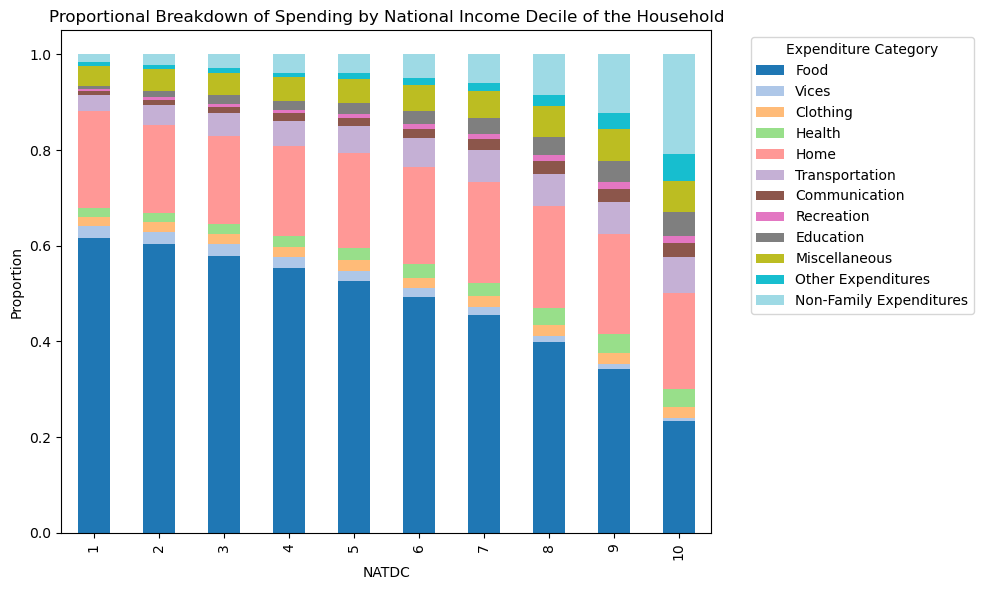

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,48.05%,12.38%,10,23.48%,1,61.68%,38.19%
Vices,1.81%,0.64%,10,0.56%,1,2.47%,1.91%
Clothing,2.17%,0.10%,1,1.94%,9,2.29%,0.36%
Health,2.75%,0.77%,1,1.79%,10,3.89%,2.10%
Home,19.95%,1.09%,2,18.33%,8,21.32%,2.99%
Transportation,5.70%,1.33%,1,3.37%,10,7.61%,4.24%
Communication,1.84%,0.75%,1,0.67%,10,2.83%,2.16%
Recreation,0.95%,0.39%,1,0.45%,10,1.64%,1.19%
Education,2.76%,1.36%,1,0.77%,10,4.94%,4.17%
Miscellaneous,5.38%,0.88%,1,4.11%,9,6.67%,2.56%


In [436]:
natdc_reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

generate_stacked_bar_summary_table(0, reindex=natdc_reindex)

Here, we look into how the proportion of spending across major expenditure categories differ for households across the 10 **national income deciles**.

---

##### Context

First, what is a **decile**? Statistically, a decile is any one of 9 values that **equally divide** a sorted group of data into **10 groups of equal frequency**. In the context of household income, we are interested in the 10 groups formed by these deciles.

We refer to these 10 groups as the **1st to 10th deciles**, with the 1st decile corresponding to the lowest 10% of total incomes and the 10th decile corresponding to the highest 10% of total incomes. Each household can then be assigned a **national income decile** based on which decile their total income falls under.

---

##### Visualization

The chart reveals interesting patterns on how **expenditure proportions** may change the higher the **national income decile** of a household is:

**Categories with Increasing Proportions**
- Health
- Transportation
- Communication
- Recreation
- Education
- Other Expenditures
- Non-Family Expenditures

**Categories with Decreasing Proportions**
- Food
- Vices

**Categories that Roughly Remained the Same**
- Clothing
- Home
- Miscellaneous

In other words, households with a higher national income decile may tend to allot a greater proportion of their expenditures on health, transportation, communication, etc. and less on food and vices.

The proportions of non-family and 'other' expenditures appeared to increase more noticeably in the higher deciles. Similarly, the proportion of food and vice expenditures appeared to decrease more noticeably in the higher deciles.

Interestingly, proportions for expenditure related to clothing, home, and miscellaneous remain almost the same visually.

---

##### Numerical Summaries

Looking at the numbers, we first notice that **most of a household's expenditures end up on food**. In fact, we can say that **the average household spends almost half of its expenditures on food alone**. However, **food expenditure varies greatly**, as visualized by the graph and as quantified by its high standard deviation ($12.38 \%$) and range ($38.19 \%$). The same goes for non-family expenditures with a standard deviation of ($5.92 \%$) and a range of ($19.33 \%$), compared to other categories with much lower standard deviations and ranges.

The next three major expenditure categories with the highest average proportions following food are

- Home                      ($19.95 \%$)
- Non-Family Expenditures   ($6.72 \%$)
- Transportation            ($5.70 \%$)

This provides us insight on what the average household spends the most on for their expenditures.

---

We may also notice that most of the groups that spent the least or most across different categories are from the **extremes** (i.e., 1st, 2nd, 9th 10th deciles). This is very meaningful, as it suggests to us that total income may be significantly related to how a household ends up spending, and thus, may provide us insights on what certain households may spend more on.

For instance, **the group that spends the least proportion on food and vices is the 10th decile (richest 10%), while the 1st decile (poorest 10%) spends the greatest proportion on the same categories**.

Similarly, the 1st decile group spends the least proportion on every other category (except for home, in which it's the 2nd decile), while the 8th to 10th decile (mostly 10th) spend the greatest proportion on those same categories.

All of this may be indicative of how **lower income households may want to prioritize food for survival and vices to help get through life**, leaving them with less money for other expenditure categories. On the other hand, **wealthier households are able to spend more money on other expenditure categories, thus lowering the proportion of other non-growing categories**. Normally, food-related expenditures do not grow that much the more income you have, so its proportion gets lower the more money a household puts into other categories.

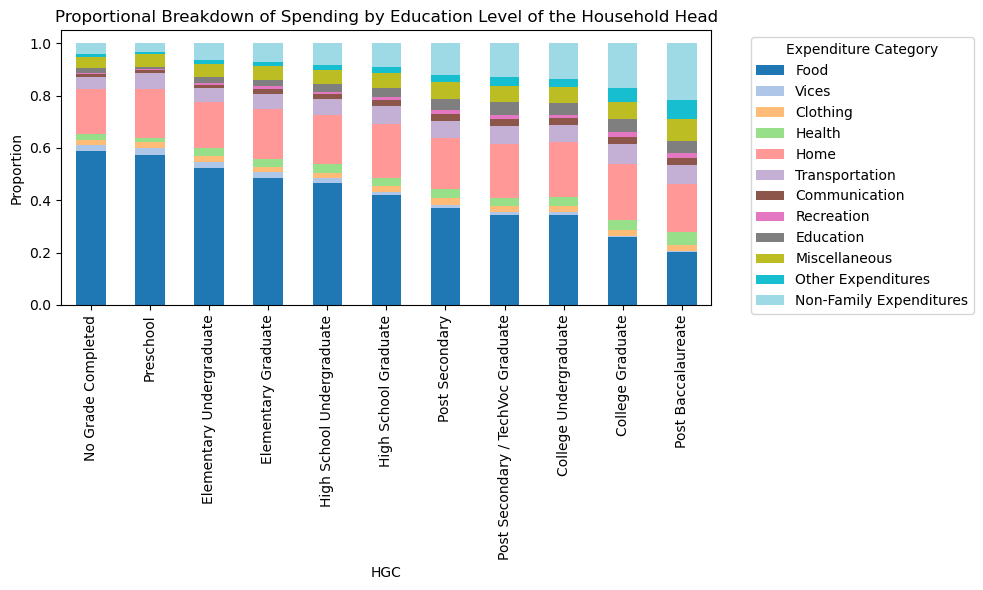

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,41.62%,12.52%,Post Baccalaureate,20.12%,No Grade Completed,58.93%,38.81%
Vices,1.51%,0.78%,Post Baccalaureate,0.36%,Preschool,2.83%,2.47%
Clothing,2.26%,0.17%,No Grade Completed,2.04%,Post Secondary,2.56%,0.51%
Health,3.13%,0.80%,Preschool,1.46%,Post Baccalaureate,4.77%,3.31%
Home,19.45%,1.47%,No Grade Completed,17.18%,College Graduate,21.75%,4.57%
Transportation,6.24%,0.87%,No Grade Completed,4.48%,Post Baccalaureate,7.40%,2.92%
Communication,2.14%,0.66%,No Grade Completed,1.06%,College Graduate,2.90%,1.84%
Recreation,1.16%,0.47%,Preschool,0.42%,Post Baccalaureate,1.91%,1.49%
Education,3.30%,1.44%,Preschool,0.62%,College Graduate,4.99%,4.37%
Miscellaneous,5.88%,1.14%,No Grade Completed,4.15%,Post Baccalaureate,8.44%,4.30%


In [437]:
hgc_reindex = [
    'No Grade Completed',
    'Preschool',
    'Elementary Undergraduate',
    'Elementary Graduate',
    'High School Undergraduate',
    'High School Graduate',
    'Post Secondary',
    'Post Secondary / TechVoc Graduate',
    'College Undergraduate',
    'College Graduate',
    'Post Baccalaureate'
]

generate_stacked_bar_summary_table(1, reindex=hgc_reindex)

##### Visualization

The chart reveals interesting patterns on how **expenditure proportions** may change the higher the **education level** of a household head is:

**Categories with Increasing Proportions**
- Health
- Home
- Transportation
- Communication
- Education
- Recreation
- Other Expenditures
- Non-Family Expenditures

**Categories with Decreasing Proportions**
- Food
- Vices

**Categories that Roughly Remained the Same**
- Clothing
- Miscellaneous

In other words, households with a household head that has a higher education level may tend to allot a greater proportion of their expenditures on health, home, transportation, communication, etc. and less on food and vices.

The proportions of non-family and 'other' expenditures appeared to increase more noticeably in the higher education levels. Similarly, the proportion of food and vice expenditures appeared to decrease more noticeably in the higher education levels, with the Post Baccalaureate level having almost no expenditure on vices.

Proportions for expenditure related to clothing and miscellaneous remain almost the same visually.

---

##### Numerical Summaries

The three major expenditure categories with the highest average proportions are

- Food                      ($48.05 \%$)
- Home                      ($19.95 \%$)
- Non-Family Expenditure    ($6.72 \%$)

We can also infer that most of the groups that spent the least or most across different categories are from the **extremes** (i.e., No Grade Completed, Preschool, College Graduate, Post Baccalaureate). This is very meaningful, as it suggests to us that educational attainment may be significantly related to how a household ends up spending.

For instance, **the group that spends the least proportion on food and vices is of the Post Baccalaureate level**, while household heads with **No Grade Completed spend the greatest proportion on food** and **Preschool education spend the greatest proportion on vices**.

Similarly, both the No Grade Completed and Preschool households spend the least proportion on every other category besides food and vices, while Post Baccalaureate and College Graduate spend the most on the same categories except Clothing, which is spent most on by Post Secondary households.

These results are very similar to our conclusions from the proportional breakdown of spending by national income decile. This could be indicative of a relationship between income and educational attainment. **Households with Post Baccalaureate level educational attainment are able to spend the most on other non-essential expenditure categories**. As stated previously, the proportion of food-related expenditures gets lower the more money a household puts into other categories

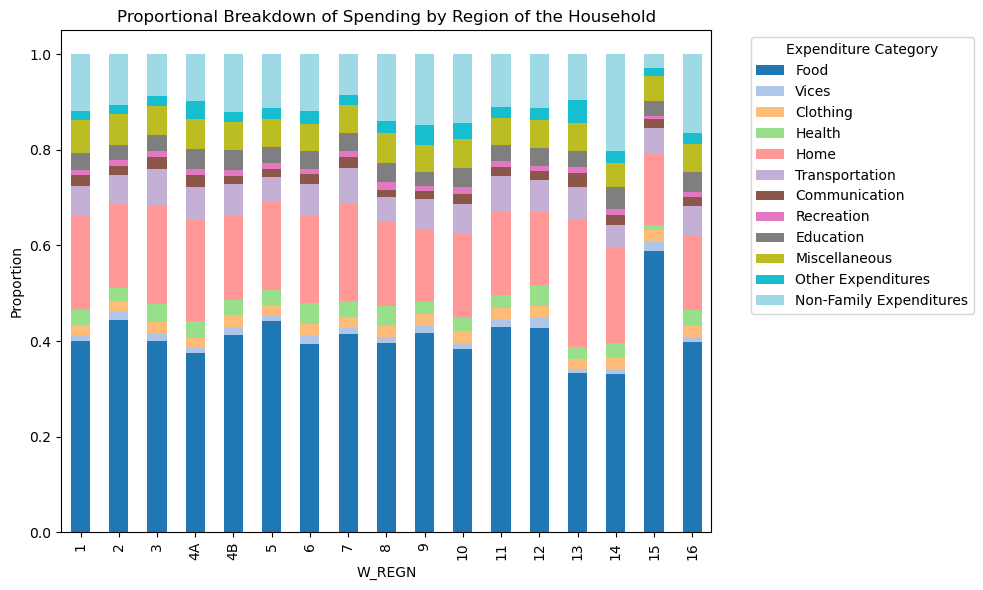

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,41.09%,5.56%,14,33.19%,15,58.79%,25.60%
Vices,1.44%,0.31%,14,0.94%,12,1.95%,1.01%
Clothing,2.31%,0.22%,13,1.95%,12,2.71%,0.76%
Health,3.21%,0.82%,15,0.90%,6,4.41%,3.51%
Home,18.44%,2.91%,15,14.93%,13,26.77%,11.84%
Transportation,6.31%,0.78%,14,4.86%,3,7.55%,2.69%
Communication,2.08%,0.38%,8,1.66%,13,2.91%,1.26%
Recreation,1.19%,0.24%,15,0.47%,8,1.58%,1.11%
Education,3.66%,0.43%,9,2.88%,14,4.62%,1.74%
Miscellaneous,5.87%,0.43%,14,5.00%,1,6.86%,1.86%


In [438]:
w_regn_reindex = ['1', '2', '3', '4A', '4B', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']

generate_stacked_bar_summary_table(2, reindex=w_regn_reindex)

##### Visualization

The chart reveals **expenditure proportions** of households across the different regions. 

**Food is consistently the largest spending category across all regions**. Region 15 noticeably spends the highest proportion on food, while regions 13 and 14 spend the least. 

The proportions spent on **transportation, clothing, recreation, and miscellaneous categories seem to be similar across most regions**, with very little differences.

---

##### Numerical Summaries

The three major expenditure categories with the highest average proportions are

- Food                      ($41.09 \%$)
- Home                      ($18.44 \%$)
- Non-Family Expenditure    ($11.74 \%$)

The three major expenditure categories with the highest standard deviation are

- Food                      ($5.56 \%$)
- Non-Family Expenditure    ($3.72 \%$)
- Home                      ($2.91 \%$)

The categories with the highest proportions also have the highest standard deviation. This shows the variation in how regions handle their expenses. 

**Region 15 allocates the highest proportion on food** ($58.79 \%$), while **Region 14 allocates the least** ($33.19 \%$). 

In contrast, categories such as **vices ($1.44\%$)**, **recreation ($1.19\%$)**, and **clothing ($2.31\%$)** have both **low mean values and small standard deviations**.

---

While food remains a priority for all regions, the proportion still varies significantly, possibly due to differences in income levels, cost of living, or access to local food sources. Regions allocating a smaller proportion to food may have higher incomes or more spending flexibility.

Categories having both low mean values and small standard deviations suggests that these discretionary spending areas are consistently minor portions of household budgets, with relatively uniform spending behavior across regions.




/tmp/ipykernel_5588/3943960565.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_summed = df.groupby(groupby_col)[list(category_values)].sum()


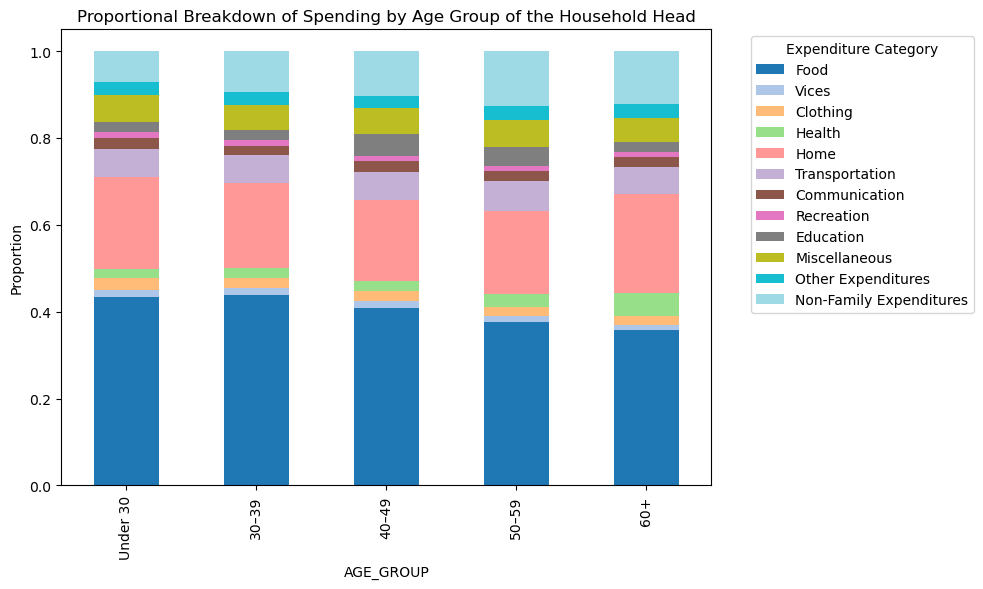

/tmp/ipykernel_5588/1826834940.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_summed = df.groupby(factor_col)[list(major_expenditure_categories.values())].sum()


,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,40.34%,3.50%,60+,35.89%,30–39,43.91%,8.02%
Vices,1.41%,0.18%,60+,1.12%,Under 30,1.59%,0.47%
Clothing,2.32%,0.28%,60+,2.00%,Under 30,2.74%,0.74%
Health,2.95%,1.32%,Under 30,2.10%,60+,5.24%,3.13%
Home,20.35%,1.75%,40–49,18.67%,60+,22.91%,4.24%
Transportation,6.47%,0.25%,60+,6.13%,50–59,6.81%,0.68%
Communication,2.32%,0.17%,30–39,2.10%,Under 30,2.55%,0.45%
Recreation,1.23%,0.08%,60+,1.12%,40–49,1.32%,0.20%
Education,3.32%,1.29%,30–39,2.36%,40–49,5.12%,2.76%
Miscellaneous,5.92%,0.24%,60+,5.60%,50–59,6.20%,0.60%


In [439]:
generate_stacked_bar_summary_table(3)

##### Visualization

As for the **age group** of the household head:

**Categories with Increasing Proportions**
- Non-Family Expenditures

**Categories with Decreasing Proportions**
- Food
- Vices (later decline)
- Clothing (slight)

**Categories that Roughly Remained the Same**
- Transportation
- Communication
- Recreation
- Miscellaneous
- Other Expenditures

**Categories with No Singular Trend**
- Health (roughly same, then sharply increased)
- Home (decreasing, then sharply increased)
- Education (sharply increased, then sharply decreased)

We can see that whereas the visualizations in the first two ordinal category breakdowns (i.e., **national income decile of the household** and **education level of the household head**), trends are now less clear in grouping by **age group of the household head** (which is also ordinal). Still, it shows decent trends in some expenditure categories and slight trends in others, which is characteristic so far of **ordinal** attribute groupings.

That said, we ought to look again the numerical summaries to gain a more precise understanding of our data.

---

##### Numerical Summaries

Like the previous groupings, *percentage in food expenditure* still remains the most variable, with the **highest standard deviation** of $3.50\%$ and range of $8.02%%$, but is much lower now relative to previous groupings. Variability of different attributes also appears to be lower now, with the range and standard deviation of several attributes being within *less than* $1\%$.

Looking at the min \% and max \% groups, we may notice a recurring pattern common in **ordinal** attribute groupings thus far. The 'highest' group (ordinal-wise) spent the **least proportion of expenditures** in the ff. categories:
- Food
- Vices
- Clothing
- Transportation
- Recreation
- Miscellaneous

However, whereas the counterpart **greatest proportion** groups in previous groupings were usually on the 'lower' end of the groupings, this time, they were pretty evenly-distributed:
- Under 30  (Vices, Clothing)
- 30-39     (Food)
- 40-49     (Recreation)
- 50-59     (Transportation, Miscellaneous)

Out of the 12 major expenditure categories, only 3 had both the extremes of the groupings (i.e., Under 30, 60+) as either min % or max %: **Vices, Clothing, and Health**. The rest of the expenditure categories had varying age groups.

Looking at the max with **greatest proportion** column, we also gain interesting insights. Households with young heads (under 30 and 30-39) spent the greatest percentage of expenditures on **Food, Vices, Clothing, and Communication.** On the other hand, households with older heads (50-59 and 60+) spent the greatest percentage of expenditures on **Health, Home, Transportation, Miscellaneous, Other Expenditures, and Non-Family Expenditures**, which may reflect more mature spending behaviors. In the middle, we have the 40-49 age group spending the most on **Recreation and Education**.

---

[extra insights]

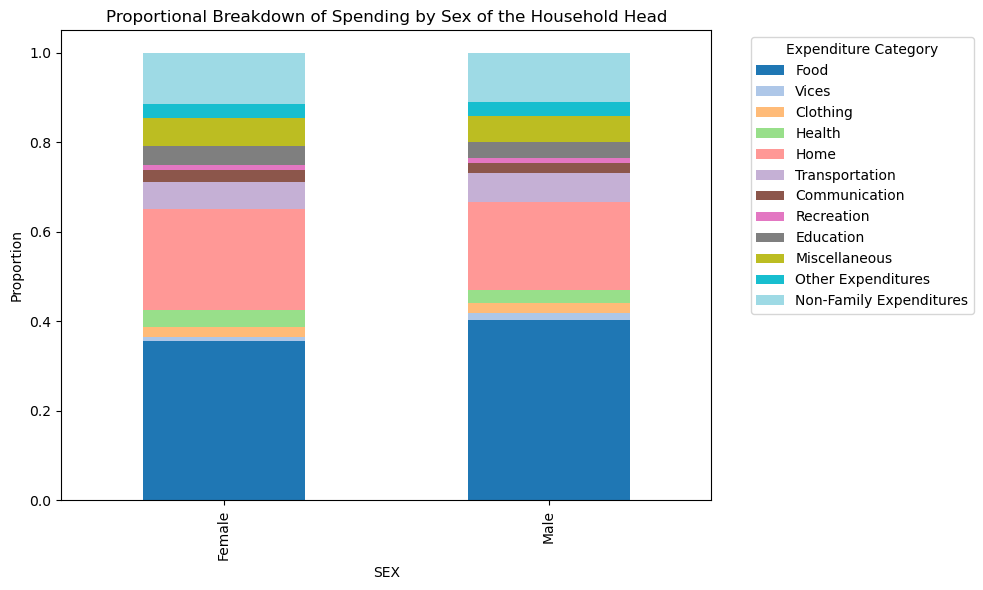

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,37.99%,3.27%,Female,35.67%,Male,40.30%,4.63%
Vices,1.16%,0.52%,Female,0.80%,Male,1.52%,0.73%
Clothing,2.19%,0.04%,Female,2.17%,Male,2.22%,0.05%
Health,3.44%,0.53%,Male,3.06%,Female,3.82%,0.75%
Home,21.03%,2.22%,Male,19.46%,Female,22.59%,3.14%
Transportation,6.36%,0.37%,Female,6.09%,Male,6.62%,0.52%
Communication,2.40%,0.28%,Male,2.21%,Female,2.60%,0.40%
Recreation,1.23%,0.05%,Male,1.20%,Female,1.27%,0.07%
Education,3.81%,0.43%,Male,3.50%,Female,4.11%,0.61%
Miscellaneous,6.01%,0.31%,Male,5.79%,Female,6.23%,0.44%


In [440]:
generate_stacked_bar_summary_table(4)

##### Visualization

The chart represents **expenditure proportions** depending on the **sex** of the household head. Overall, the proportions are fairly similar between male and female household heads; however, the following noticebale differences can be observed:

**Categories with Higher Proportions for Female Heads**
- Home
- Health
- Recreation
- Education
- Miscellaneous

**Categories with Higher Proportions for Male Heads**
- Food
- Vices
- Transportation

**Categories that Roughly Remained the Same**
- Clothing
- Communication
- Other Expenditures
- Non-Family Expenditures

In other words, households with a **male household head** may tend to allot a greater proportion of their expenditures on **food, vices, and transportation**. Households with a **female household head** may tend to spend more on **home, health, recreation, education, and miscellaneous**. The other categories remained roughly the same.

The most noticeable differences in proportion are in food, home and vices, while the other categories have noticeable but very small differences.

---



##### Numerical Summaries

The three major expenditure categories with the highest difference in proportion are:

- Food            ($4.63 \%$)
- Home            ($3.14 \%$)
- Health          ($0.75 \%$)

The proportional breakdown of spending by sex of the household head reveals that there is **barely any significant difference between male and female headed households**. Almost all categories have a **difference of less than $1 \%$**, with only food and home having a difference of $4.63 \%$ and $3.14 \%$ respectively. These narrow ranges suggest that **gender does not play a substantial role in the expenditure patterns of households**, with both groups displaying similar priorities across all categories.

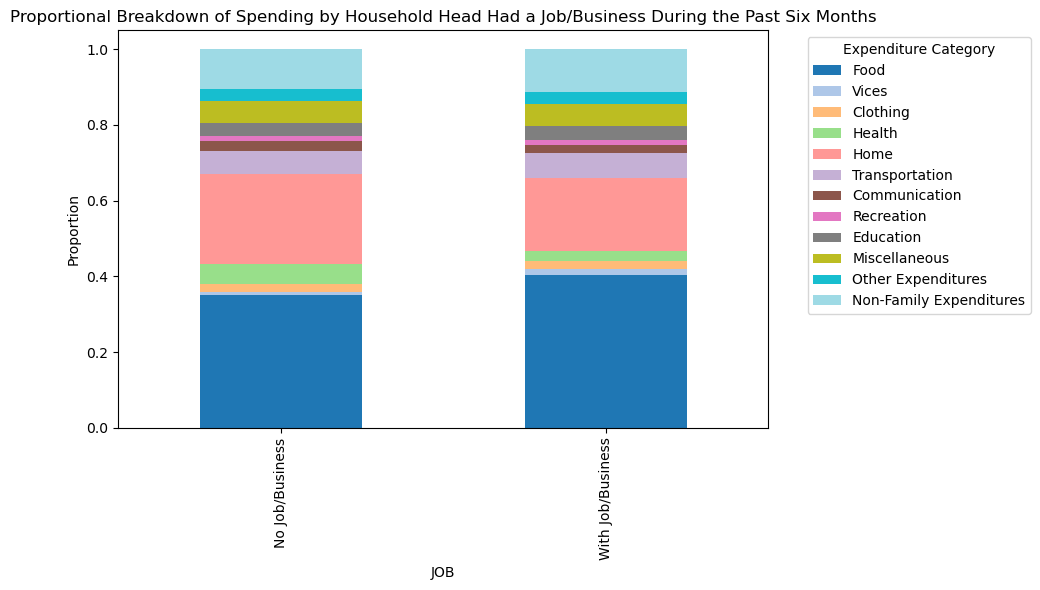

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,37.69%,3.80%,No Job/Business,35.00%,With Job/Business,40.37%,5.37%
Vices,1.20%,0.38%,No Job/Business,0.93%,With Job/Business,1.47%,0.54%
Clothing,2.16%,0.12%,No Job/Business,2.07%,With Job/Business,2.24%,0.17%
Health,3.94%,1.73%,With Job/Business,2.71%,No Job/Business,5.17%,2.45%
Home,21.48%,3.20%,With Job/Business,19.22%,No Job/Business,23.75%,4.53%
Transportation,6.43%,0.15%,No Job/Business,6.32%,With Job/Business,6.54%,0.22%
Communication,2.40%,0.25%,With Job/Business,2.22%,No Job/Business,2.58%,0.35%
Recreation,1.22%,0.01%,With Job/Business,1.21%,No Job/Business,1.22%,0.01%
Education,3.58%,0.16%,No Job/Business,3.46%,With Job/Business,3.70%,0.23%
Miscellaneous,5.89%,0.02%,No Job/Business,5.87%,With Job/Business,5.90%,0.02%


In [441]:
generate_stacked_bar_summary_table(5)

##### Visualization

Lastly, we explore how the **household head's job/business status during the past six months** may relate to their **expenditure proportions**. Since there are only two groupings (as far as the data permits us) and the grouping is **nominal**, we don't need to spot for possible 'trends.'

Visually, several expenditure categories appear to have subtle if not clear differences in proportion, with the clearest being **Food, Health, and Home**. We will explore further through numerical summaries.

---

##### Numerical Summaries

**Households with heads who had a job/business during the past six months** spent more on the ff. categories:
- Food
- Vices
- Clothing
- Transportation
- Education
- Miscellaneous
- Other Expenditures
- Non-Family Expenditures

On the other hand, **households with heads who had no job/business during the past six months** spent more on the ff. categories:
- Health
- Home
- Communication
- Recreation

There may be **greater** variability here compared to the previous grouping (i.e, sex of the household head). Besides **Food** and **Home**, there is now a significant difference of at least $1\%$ in **Health** expenditures, with a range of $2.45\%$. *Households with heads who had no job/business during the past six months* spent **more** on health.

This may suggest that **households may choose not to decrease health-related expenditures simply because their head does not have a job or business**, given the **essential nature** of such expenditures. Even if they have less money to spend, they oftentimes have no choice but to allot money to these essential expenditures anyways. As such, a greater percentage ends up to these categories.

The same could be said for **Food** and **Home** expenditures, which may possibly explain the greater variability in those variables across all groupings.

Expenditure proportion differences remain roughly the same for other categories.

#### 2. Which regions spend the highest proportion of their food expenditure on various food categories?

For this EDA question, we aim to understand how regional preferences or constraints might affect household food spending patterns in the Philippines. Specifically, we are interested in how different regions allocate their **total food expenditure (T_FOOD)** across various **food categories**.

We consider the following food categories, which are atomic components of T_FOOD:

In [442]:
food_categories = {
    'Bread and Cereals': 'T_BREAD',
    'Meat': 'T_MEAT',
    'Fish and Seafood': 'T_FISH',
    'Milk, Cheese, and Eggs': 'T_MILK',
    'Oils and Fats': 'T_OIL',
    'Fruits': 'T_FRUIT',
    'Vegetables': 'T_VEG',
    'Sugar and Sweets': 'T_SUGAR',
    'Coffee, Tea, Cocoa': 'T_COFFEE',
    'Mineral Water, Juices, Softdrinks': 'T_MINERAL',
    'Other Vegetables': 'T_OTHER_VEG',
    'Food Not Elsewhere Classified': 'T_FOOD_NEC'
}

To compare across regions fairly, we will compute the **proportion** of each food category relative to the household’s total food expenditure. Then, we will aggregate these proportions by region to find out where each food category gets the **highest and lowest share** of the food budget.

In [443]:
# Compute proportion of food spending per category
for label, col in food_categories.items():
    df[f'P_{col}'] = df[col] / df['T_FOOD']

We now calculate the **average proportion** spent on each food category for each region:

In [444]:
# Extract region-wise average proportions
region_food_props = df.groupby('W_REGN')[[f'P_{col}' for col in food_categories.values()]].mean()

# Rename columns for clarity
region_food_props.columns = food_categories.keys()

# Sort values within each category to find which regions spend the most
region_food_props_transposed = region_food_props.T

To better interpret these values across all regions and food categories, we generate a heatmap:

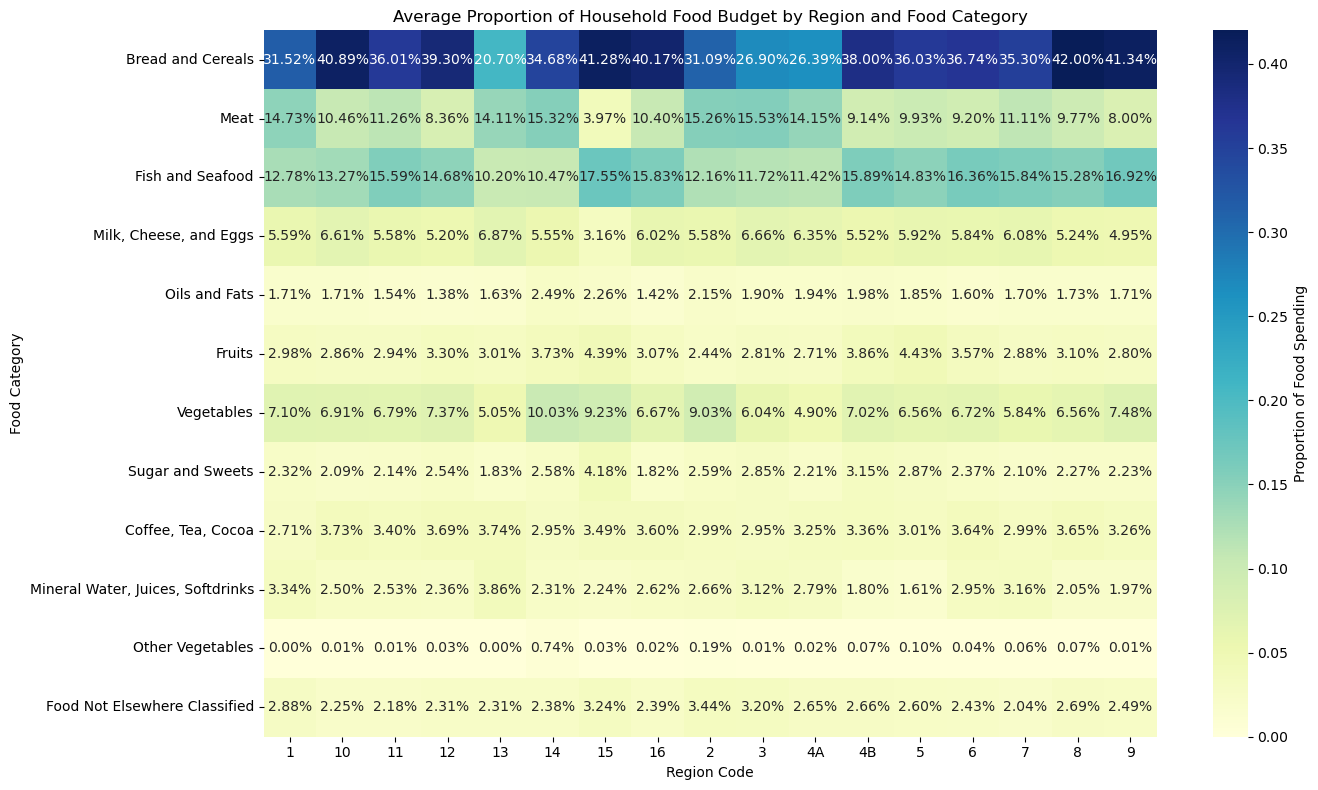

In [445]:
plt.figure(figsize=(14, 8))
sns.heatmap(region_food_props_transposed, cmap="YlGnBu", annot=True, fmt=".2%", cbar_kws={'label': 'Proportion of Food Spending'})
plt.title("Average Proportion of Household Food Budget by Region and Food Category")
plt.xlabel("Region Code")
plt.ylabel("Food Category")
plt.tight_layout()
plt.show()

This heatmap allows us to see which **regions prioritize which types of food** the most.

#### 3. Is there a correlation between total household income and the proportion of food expenditure spent on food consumed outside the home?

With this EDA question, we want to explore whether higher **total household income** may be related to an increased or decreased **proportion of food expenditure spent on food consumed outside the home**.

First, let us define a function that generates and displays a **scatterplot** for correlation. We can add keyword arguments `log_x` and `log_y` to allow for **log transformation** of values before plotting on the x-axis, y-axis, or both. Note that this **does not modify** the values in the data frame; it only affects how they are plotted.

In [446]:
def generate_scatter(data, x, y, log_x=False, log_y=False, title=None):
    sns.scatterplot(data=data, x=x, y=y)

    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    plt.title(title or f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)

    plt.tight_layout()
    plt.show()

Let us also define a function that shows a high-level summary of a numeric attribute **visually** (through a boxplot) and **numerically** (through common numerical measures).

In [447]:
def generate_numeric_col_summary(series, title=None):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=series)
    plt.title(title or f"Boxplot of '{series.name}'")
    plt.xlabel(series.name)
    plt.tight_layout()
    plt.show()
    
    print(f"----- Numerical summaries of column '{series.name}' -----")
    print(f"Mean    : {series.mean():.2f}")
    print(f"Median  : {series.median():.2f}")
    print(f"Std Dev : {series.std():.2f}")

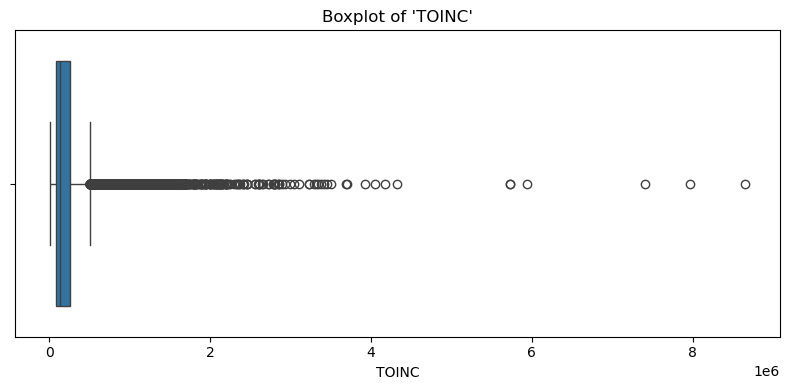

----- Numerical summaries of column 'TOINC' -----
Mean    : 217618.68
Median  : 140125.00
Std Dev : 253695.02


In [448]:
generate_numeric_col_summary(df['TOINC'])

Since the distribution of **total income** is clearly **right-skewed** (i.e., there are households with very high income), we would need to apply **log transformation** to its values. Moreover, it would be sensible plotting total income on the x-axis since we're interested on seeing how increasing it would impact the other variable.

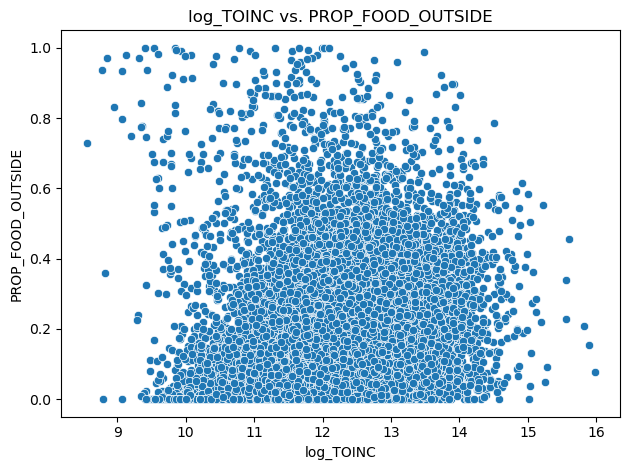

Correlation (r) between log(TOINC) and PROP_FOOD_OUTSIDE = 0.35


In [449]:
df['log_TOINC'] = np.log(df['TOINC'])

generate_scatter(df, 'log_TOINC', 'PROP_FOOD_OUTSIDE')

correlation_value = df['log_TOINC'].corr(df['PROP_FOOD_OUTSIDE'])
print(f"Correlation (r) between log(TOINC) and PROP_FOOD_OUTSIDE = {correlation_value:.2f}")

Unfortunately, we got a scatterplot and a correlation value that are not suggestive of a strong relationship between the two variables.

Results like these are alright, as the primary purpose of EDA is to **explore** *potential* patterns and trends on our data that could prompt us to dive deeper into certain aspects of it. In this case, we just have to explore more possible relationships, which we will do so in the next EDA.

#### 4. Is there a correlation between total household income and any major expenditure category?

This EDA question seeks to analyze relationships between **total income** and **major expenditure categories**. **log transformation** will be used to normalize the otherwise skewed data. Pearson's r correlation will then be used to calculate the **r values** of the relationships of the major expenditure categories and total income.

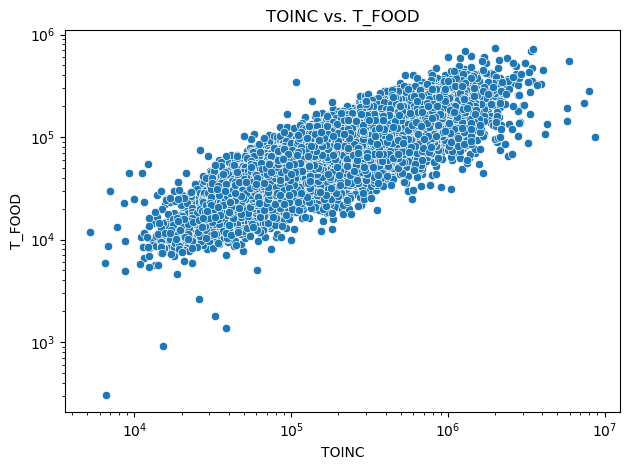

Correlation (r) between 'TOINC' and 'T_FOOD' = 0.78


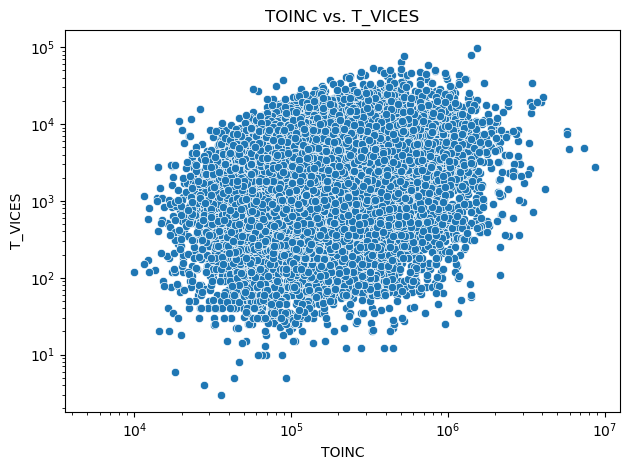

Correlation (r) between 'TOINC' and 'T_VICES' = 0.21


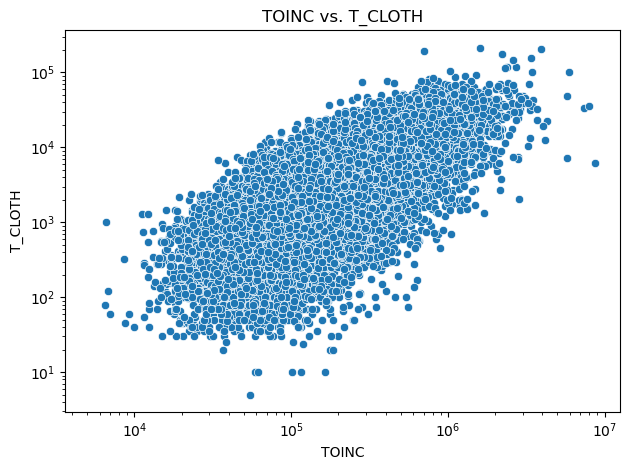

Correlation (r) between 'TOINC' and 'T_CLOTH' = 0.57


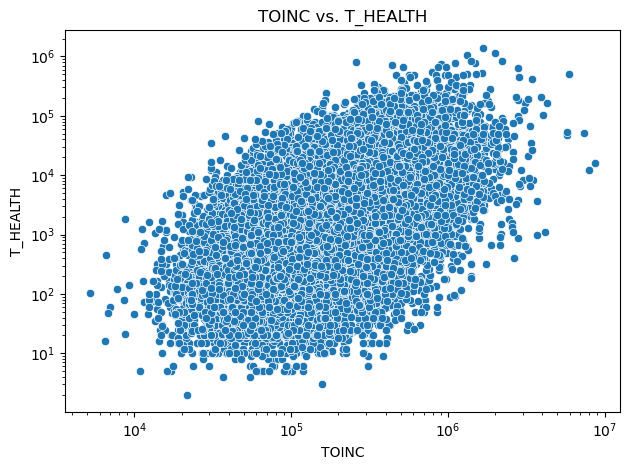

Correlation (r) between 'TOINC' and 'T_HEALTH' = 0.27


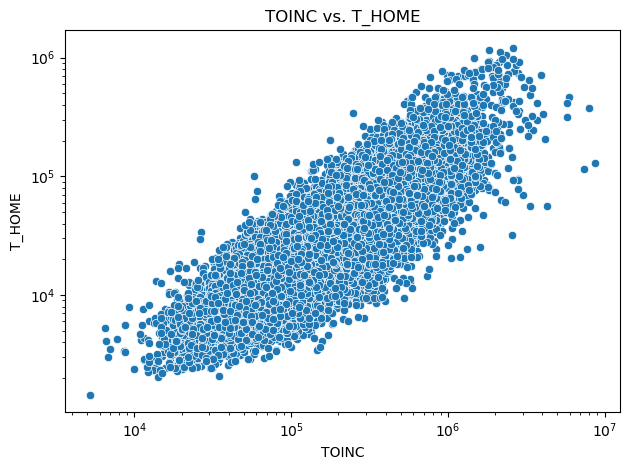

Correlation (r) between 'TOINC' and 'T_HOME' = 0.65


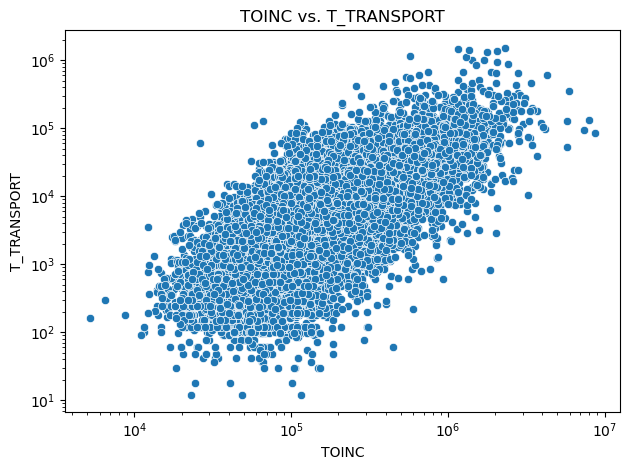

Correlation (r) between 'TOINC' and 'T_TRANSPORT' = 0.43


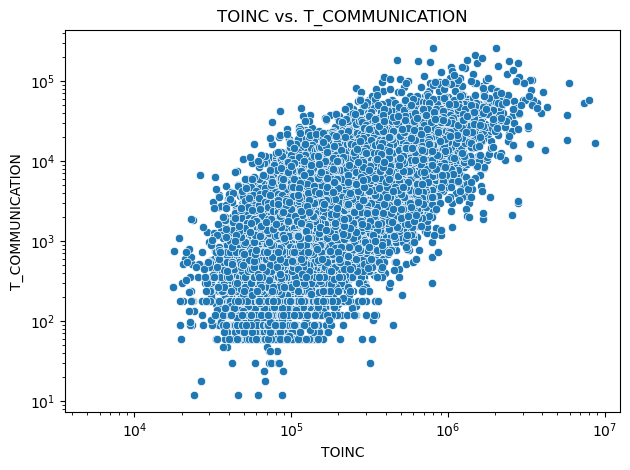

Correlation (r) between 'TOINC' and 'T_COMMUNICATION' = 0.59


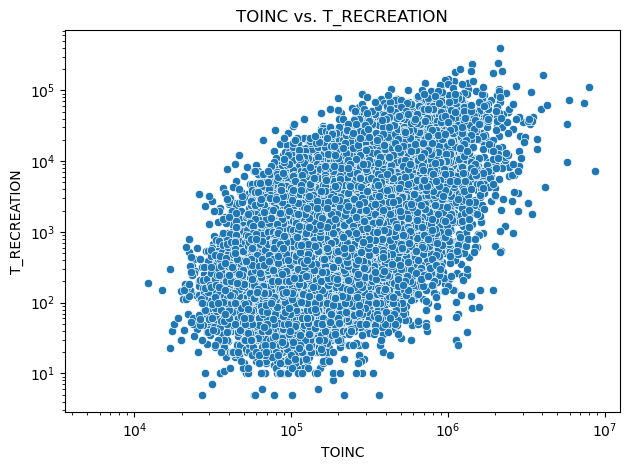

Correlation (r) between 'TOINC' and 'T_RECREATION' = 0.38


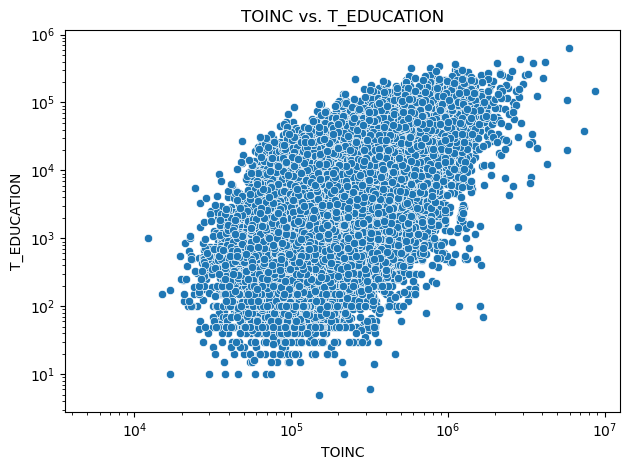

Correlation (r) between 'TOINC' and 'T_EDUCATION' = 0.43


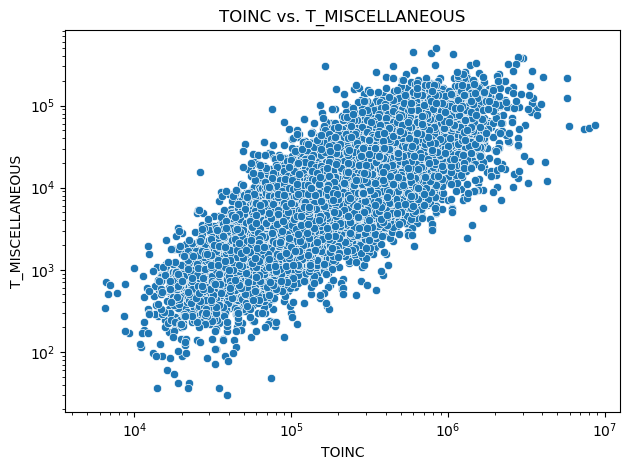

Correlation (r) between 'TOINC' and 'T_MISCELLANEOUS' = 0.61


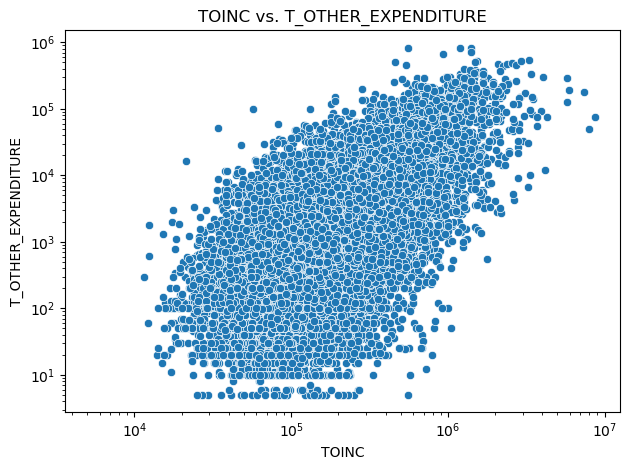

Correlation (r) between 'TOINC' and 'T_OTHER_EXPENDITURE' = 0.41


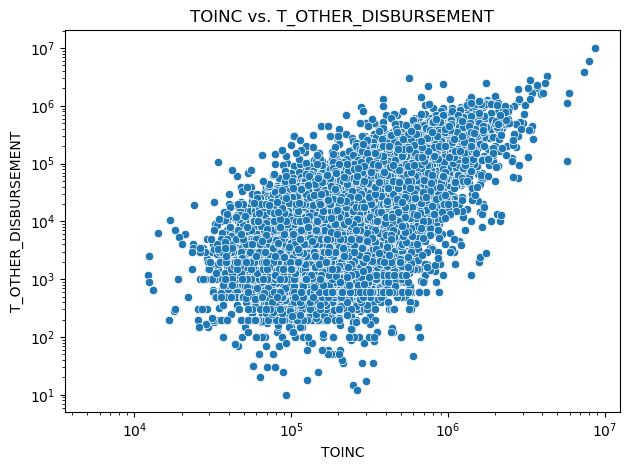

Correlation (r) between 'TOINC' and 'T_OTHER_DISBURSEMENT' = 0.36


In [450]:
for attr in major_expenditure_categories.values():
    generate_scatter(df, 'TOINC', attr, log_x=True, log_y=True)
    
    correlation_value = df['log_TOINC'].corr(df[attr])
    print(f"Correlation (r) between 'TOINC' and '{attr}' = {correlation_value:.2f}")

It is quite fascinating to see that all the relationships of **total income** and every major expenditure category is at least **slightly positively correlated.** Let us take a deeper look at every relationship we have explored.


**People with a higher income spend more on food.** This is very evident in the visualization generated above. The relationship with an r value of **0.78** indicates a strong positive correlation between **total income** and **expenditure spent on food**.


There are also some other **strong positive correlations** explored within this EDA! We can also see that **people with a higher income also spend more on their home and miscellaneous matters**. These all should be given, as these are the basic needs of everyone in the modern era. Food is a given, water, electricity, and shelter are all included under `T_HOME` with an r value of **0.65**, and personal hygiene is included under `T_MISCELLANEOUS` with an r value of **0.61**. Based on this information, we can see that **there is a strong positive correlation between total income and expenditures on basic needs such as food, water, shelter, and hygiene**.


The remaining relationships are not as strongly related as the ones mentioned above. However, the following categories have a **moderately positive correlation** with **total income**: clothing, transport, communication, education, and other categories. Although they are not basic human needs, the categories mentioned here are still essential in this modern day. The relationship of **total income** with **expenditure on clothing** was measured to have an r value of **0.57**. Meanwhile, its relationship with **transport expenses** indicated an r value of **0.43**. Next, its relationship with **communication expenses** has an r value of **0.59**. Lastly, its relationship with **education related expenditures** and **other expenses such as insurance** attained an r value of **0.43** and **0.41**, respectively. All of these essentials are not basic needs, but they are **among the top priorities** of people as **they spend more on these categories the higher their income is**.


Lastly, we have some **weak positive correlations** between total income and our last few categories. These categories include  vices, recreation, health, and disbursements. While health might seem essential, it is not often that you pay a visit to the hospital or the dentist, so a weak positive correlation with an r value of **0.27** between **total income** and **health related expenditures** makes sense. Vices and recreation expenses are non-essential, which makes sense why their respective r values of **0.21** and **0.38** indicate only weak positive correlations as well. Lastly, the relationship between **other disbursements** and **total income** net a weak positive correlation with an r value of **0.36**.


Overall, this EDA question explored how **the higher the income, the more people spend on essentials**. It provides us much insight into the priorities of people and where they put their money in, especially those with more income!

#### 5. How does housing expenditure differ between urban and rural households?

In this EDA question, we want to explore how **housing expenditure** varies between households in **urban** and **rural** areas.

First, we want to focus only on attributes **directly related to housing expenditure**. These are variables that reflect the actual costs incurred by the households for living in and maintaining their homes.

Let us create a new `DataFrame` containing only the rows from `df` associated with housing expenditure.

In [451]:
housing_cols = ['URB', 'TENURE', 'T_FURNISHING', 'T_HOUSING_WATER', 'T_ACTRENT', 'T_RENTVAL', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT']
housing_df = df[housing_cols]
housing_df.head()

,URB,TENURE,T_FURNISHING,T_HOUSING_WATER,T_ACTRENT,T_RENTVAL,T_IMPUTED_RENT,T_BIMPUTED_RENT
0,Rural,1,3598,55128,0,19200,19200,0
1,Rural,1,4304,24492,0,2700,2700,0
2,Rural,1,3161,40560,0,15000,15000,0
3,Rural,1,21548,33714,0,6000,6000,0
4,Rural,1,2871,70812,0,54000,54000,0


Let us begin my analyzing the total housing-related expenditure, captured in the **T_HOUSING_WATER** attribute. This includes not only rent (both actual and imputed), but also costs for utilities such as electricity, water, gas, and housing maintenance.

With this, we aim to capture a more complete picture of household expenses related to shelter and basic living infrastructure.

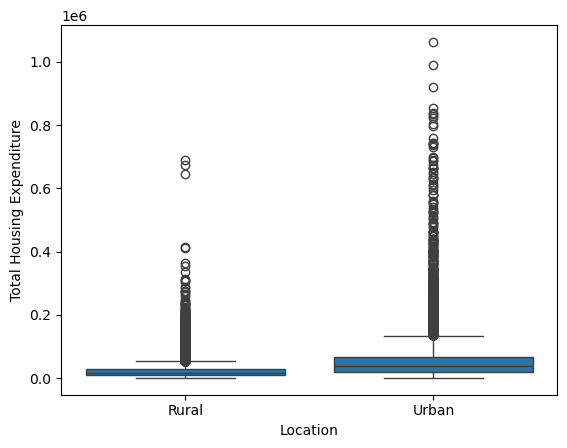

       count          mean   median           std   min      max
URB                                                             
Rural  24798  23330.134527  15123.0  25426.604663   720   690450
Urban  15373  54874.817797  37848.0  63606.462918  1932  1062600


In [452]:
sns.boxplot(data=housing_df, x='URB', y='T_HOUSING_WATER')
plt.xlabel('Location')
plt.ylabel('Total Housing Expenditure')
plt.show()

summary_stats = housing_df.groupby('URB')['T_HOUSING_WATER'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

print(summary_stats)

From the boxplot, we can infer the following:

**Urban households tend to spend more overall.** The median expenditure is **noticeably higher** for urban households (37,848) compared to rural ones (15,123). This suggests that urban households generally face higher housing and utility costs.

The interquartile range is also **wider for urban households**, and they have a **significantly higher** standard deviation indicating **more variability**. This may be reflective of **diverse housing conditions** and **access to utilities and services** in cities.

**Urban areas have more extreme outliers**, some approaching or even exceeding P1,000,000. 

**Rural households have lower and tighter expenditures.** It is more concentrated towards the lower end, with **less variability and fewer outliers**. This could be due to lower rent prices, limited infrastructure, or subsidized services in rural areas.

---

Next, let us compare the **T_ACTRENT** of urban and rural households, to explore how actual rent payments differ between them.

We will filter out 0s, which are households that don't pay rent, to focus only on renting households.

In [453]:
rent_values = housing_df[housing_df['T_ACTRENT'] > 0]
rent_values.head()

,URB,TENURE,T_FURNISHING,T_HOUSING_WATER,T_ACTRENT,T_RENTVAL,T_IMPUTED_RENT,T_BIMPUTED_RENT
245,Rural,3,2098,8958,1200,3000,1800,0
249,Rural,3,1201,18510,3600,7800,4200,0
309,Urban,2,4916,75972,30000,30000,0,0
324,Urban,2,1388,27126,18000,18000,0,0
342,Urban,3,1200,24252,1200,13200,12000,0


Let us create a **boxplot** to help us visualize the differences in the distribution and spread of rent payments.

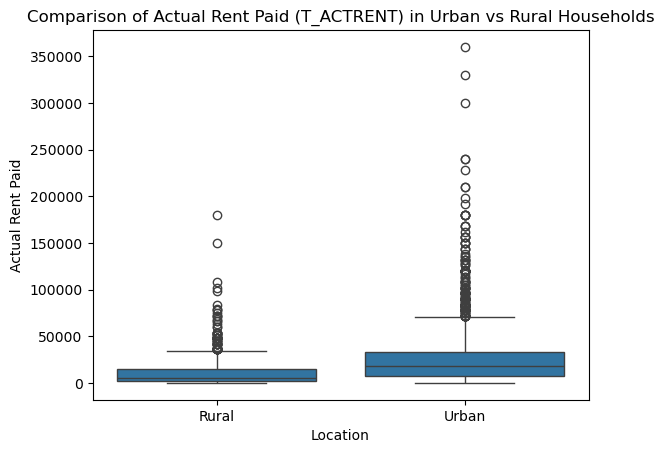

       count          mean   median           std  min     max
URB                                                           
Rural   1061  10744.020735   4800.0  15501.714264   24  180000
Urban   2594  25932.587510  18000.0  30139.914736  150  360000


In [454]:
sns.boxplot(data=rent_values, x='URB', y='T_ACTRENT')
plt.title('Comparison of Actual Rent Paid (T_ACTRENT) in Urban vs Rural Households')
plt.xlabel('Location')
plt.ylabel('Actual Rent Paid')
plt.show()

summary_stats = rent_values.groupby('URB')['T_ACTRENT'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

print(summary_stats)

From this, we can infer the following:

**Urban households tend to pay more rent**. This is evident as the median rent is **significantly higher** for urban households (18,000) than for rural ones (4,800). This suggests that on average, urban households pay more in rent. 

**Rural households' have lower and less varied rents**. The boxplot is smaller and skewed lower, meaning most rural households pay relatively low rent, with fewer extreme values.

There are **more and higher outliers in urban areas**. The urban households have more extreme rent values, with some reaching beyond P300,000.

---

Let us also compare the house rent or rental values (**T_RENTVAL**) to compare housing values more consistently across both renters and owners.

We will create another boxplot to help us visualize the difference.

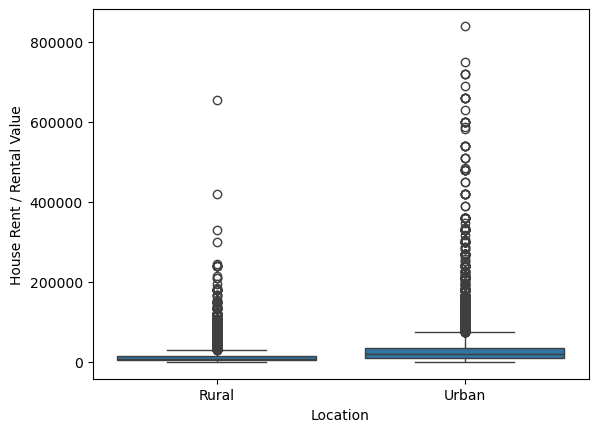

       count          mean   median           std  min     max
URB                                                           
Rural  24798  12699.366320   7200.0  16772.437567  480  654000
Urban  15373  33158.069733  21000.0  47916.535084  120  840000


In [455]:
sns.boxplot(data=housing_df, x='URB', y='T_RENTVAL')
plt.xlabel('Location')
plt.ylabel('House Rent / Rental Value')
plt.show()

summary_stats = housing_df.groupby('URB')['T_RENTVAL'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

print(summary_stats)

From this, we can infer the following:

**Urban households have higher house rent / rental value**. This is evident as the median rent is **higher** for urban households (21,000) than for rural ones (7,200). This suggests that on average, urban households live in higher-valued housing, either through actual rent payments or the imputed value of owned housing.

**Rural households' have lower and less varied house rent / rental value**. The boxplot is smaller and skewed lower, meaning most rural households are valued lower, with less extreme values.

There are **higher-value outliers in urban areas**, implying that some urban homes have exceptionally high house rent or rental values. This is possibly from luxury housing or densely populated cities.

<br>

From this exploratory analysis of housing-related expenditures, we observed the following key differences between urban and rural households:

**Urban households tend to spend more on housing.** Across different metrics, urban households consistently have higher median values compared to rural areas. There is also **greater variability in urban housing costs**, as seen in the higher standard deviation. The boxplots reveal a wider spread of values, with numerous high-value outliers for urban households. This is possibly due to premium housing and greater income diversity in cities. 

**Rural households have lower and more consistent housing expenditure.** Their distributions are more compact, with fewer outliers and lower medians, indicating more modest and homogeneous living costs. 

These patterns highlight the divide in housing affordability and property value between urban and rural areas, providing a useful foundation for further testing or insights.

<br>

### Wrap-Up

With that, we have now finished our exploratory data analysis. For each EDA question, we constructed various appropriate **visualizations** and **numerical summaries** that provided us with meaningful insights and patterns worth looking into. Moving forward, we will be keeping these patterns in mind, as we will be using them as basis to extract more insights from the dataset through [**data mining**](#iv-data-mining).

<br>

## IV. Data Mining

>write stuff

<br>

First, we will look into **clustering** households by *major expenditure category breakdown*. We can use the **K-means clustering** algorithm, which the `scikit-learn` library allows us to implement pretty easily.

>normalization explanation

In [456]:
total_major_expenditures = df[major_expenditure_categories.values()].sum(axis=1)

for col in major_expenditure_categories.values():
    df[f'PROP_{col[2:]}'] = df[col] / total_major_expenditures

expenditure_prop_cols = [f'PROP_{col[2:]}' for col in major_expenditure_categories.values()]
expenditure_prop_df = df[expenditure_prop_cols]

>testing different hyperparameters explanation

>inertia

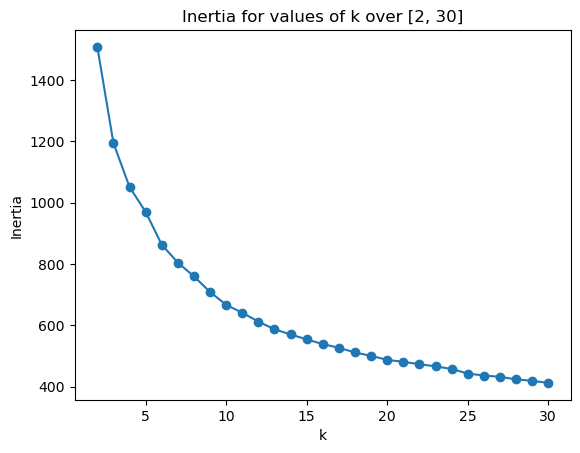

In [457]:
MAX_K = 30
SEED = 26

k_means_models = {}

# Create a dictionary of models and their inertias over K
for k in range(2, MAX_K + 1):
    model = KMeans(n_clusters=k, random_state=26)
    model.fit(expenditure_prop_df)
    k_means_models[k] = {
        'model': model,
        'inertia': model.inertia_
    }

inertia_df = pd.DataFrame([
    {'k': k, 'inertia': info['inertia']} for k, info in k_means_models.items()
])

inertia_df['Δ inertia'] = inertia_df['inertia'] - inertia_df['inertia'].shift(1)
inertia_df['% decrease'] = np.abs(inertia_df['Δ inertia']) / inertia_df['inertia'].shift(1) * 100

plt.plot(inertia_df['k'], inertia_df['inertia'], marker='o')
plt.title(f'Inertia for values of k over [2, {MAX_K}]')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

This table is a plot of the inertia of k over [2, 30]. To decide on a value for our k-means *hyperparameter* (k), we can rely on a clustering technique called the **Elbow method**. The method advises us to choose the *elbow point*, a value where the *rate of improvement* (or % decrease) in inertia falls *sharply*. Visually, this may be the value of k from which the inertia appears to *stabilize* in its decrease.

However, it may not be that obvious from first glance. From the graph above, we can tentatively consider `k = 6` or `k = 7` as the decrease appears to stabilize from then. We can confirm this by plotting the *% decrease in inertia* for values of k.

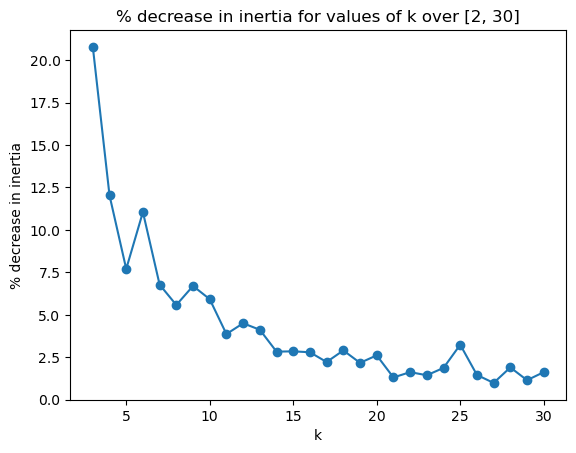

 k  % decrease
 2         NaN
 3       20.78
 4       12.03
 5        7.70
 6       11.05
 7        6.77
 8        5.58
 9        6.70
10        5.92
11        3.87
12        4.50
13        4.12
14        2.83
15        2.85
16        2.79
17        2.22
18        2.90
19        2.17
20        2.61
21        1.31


In [458]:
plt.plot(inertia_df['k'], inertia_df['% decrease'], marker='o')
plt.title(f'% decrease in inertia for values of k over [2, {MAX_K}]')
plt.xlabel('k')
plt.ylabel('% decrease in inertia')
plt.show()

print(inertia_df[['k', '% decrease']].head(20).round(2).to_string(index=False))

Indeed, the plot and table above show that *% decrease in inertia* falls significantly from k = 6 ($11.05 \%$) to k = 7 ($6.77 \%$) and appears to stabilize from then on. It supports our visual intuition that `k = 7` is the *elbow point* and can thus proceed with clustering our observations.

In [459]:
final_k_means_model = k_means_models[7]['model']

df['Cluster'] = final_k_means_model.labels_
print(df['Cluster'].value_counts().sort_index())

Cluster
0      991
1     8043
2     2592
3    12431
4     3159
5     5480
6     7475
Name: count, dtype: int64


>cluster size explanation

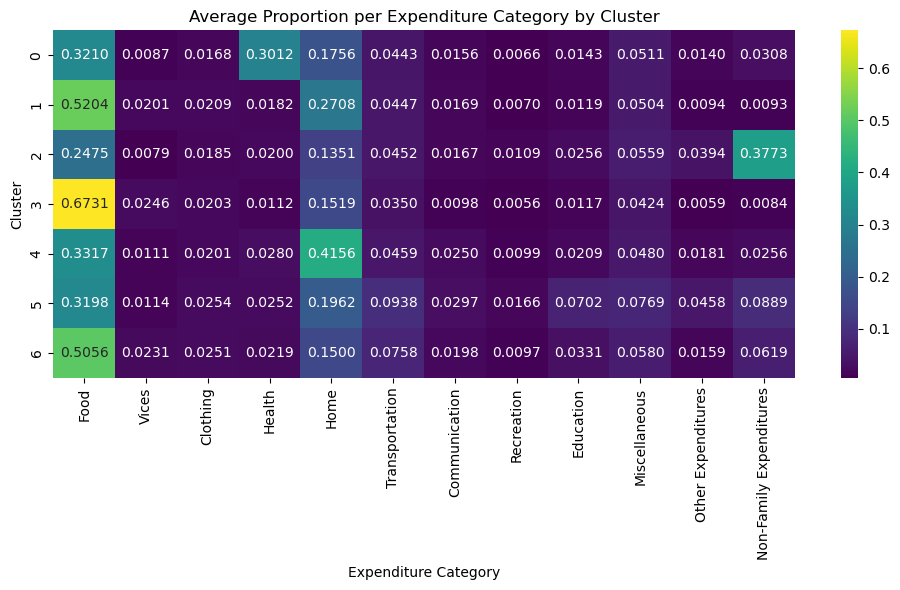

In [460]:
cluster_means = df.groupby('Cluster')[expenditure_prop_cols].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_means,
    annot=True,
    fmt=".4f",
    cmap="viridis",
    xticklabels=major_expenditure_categories.keys()
)

plt.title("Average Proportion per Expenditure Category by Cluster")
plt.xlabel("Expenditure Category")
plt.tight_layout()
plt.show()

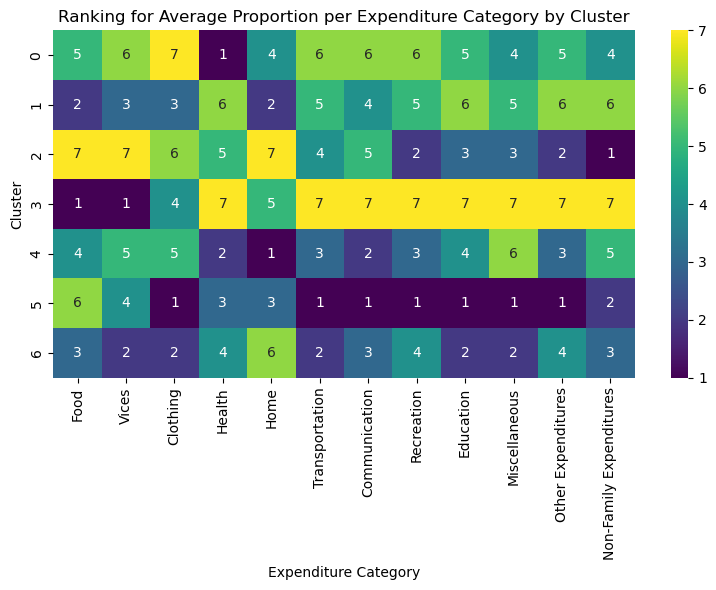

In [461]:
cluster_ranks = cluster_means.rank(ascending=False).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cluster_ranks,
    annot=True,
    cmap="viridis",
    xticklabels=major_expenditure_categories.keys()
)

plt.title("Ranking for Average Proportion per Expenditure Category by Cluster")
plt.xlabel("Expenditure Category")
plt.tight_layout()
plt.show()

### Insights and Interpretations

In terms of *expenditure proportions*:

**Cluster 0**
- *Highest* (1st) in **Health**
- *Middle* (4th) to *lowest* (7th) in every other category
>Might be comprised mostly of households with *older* heads

**Cluster 1**
- *Second highest* (2nd) in **Food** and **Home**
- *Third highest* (3rd) in **Vices** and **Clothing**
- *Middle* (4th) to *second lowest* (6th) in every other category
- Appears to have to allot a *significant* proportion of their expendable money to *greater essentials* (e.g., Food, Home, Clothing)
>Might be comprised mostly of households with a *low* to *lower-middle* national income decile (1st to 5th decile)

**Cluster 2 (done)**
- *Highest* (1st) in **Non-Family**
- *Second highest* (2nd) in **Recreation** and **Other**
- *Third highest* (3rd) in **Education** and **Miscellaneous**
- *Middle* (4th) to *second lowest* (6th) in every other category
- Able to allot a *significant* proportion of their money to *non-family expenditures*, signifying they have more than enough money to fulfill their basic needs
>Might be comprised mostly of households with a *high* national income decile (9th to 10th decile)

**Cluster 3 (done)**
- *Highest* (1st) in **Food** and **Vices**
- *Middle* (4th) in Clothing and *third lowest* (5th) in Home
- *Lowest* (7th) in every other category
- Appears to have to allot a *much lower* proportion of their expendable money to *lesser essentials* (e.g., Transportation, Communication, Education) to have enough for *greater essentials*
>Might be comprised mostly of households with a *low* national income decile (1st to 3rd decile)

**Cluster 4**
- *Highest* (1st) in **Home**
- *Second highest* (2nd) in **Health** and **Communication**
- *Third highest* (3rd) in **Transportation**, **Recreation**, and **Other Expenditures**
- *Middle* (4th) to *second lowest* (6th) in every other category
- Appears to have a somewhat *distributed* allotment of disposable money, leading towards *lesser essentials*
>Might be comprised mostly of households with a *upper-middle* national income decile (6th to 8th decile)

**Cluster 5**
- *Highest* (1st) in **Clothing**, **Transportation**, **Communication**, **Recreation**, **Education**, **Miscellaneous**, and **Other Expenditures**
- *Second highest* (2nd) in **Non-Family Expenditures**
- *Third highest* (3rd) in **Health** and **Home**
- *Middle* (4th) and *second lowest* (6th)
- Appears to be able to allot a *much greater* proportion of their expendable money to *lesser essentials*
>Might be comprised mostly of households with a *high* national income decile (7th to 10th decile)

**Cluster 6**
- *Second highest* (2nd) in **Vices**, **Clothing**, **Transportation**, **Education**, and **Miscellaneous**
- Appears to have a *distributed* allotment of disposable money
>Might be comprised mostly of households with a *middle* national income decile (4th to 6th decile)

In [462]:
# TODO: Look into the following:
# - region of the household
# - age group of the head of the family
# - national income decile of the household
# - educational attainment of the head of the family

# For region breakdown by cluster
# % breakdown of IncomeDecile within each cluster
def display_crosstab_by_cluster(grouping, reindex=None):
    crosstab = pd.crosstab(df['Cluster'], df[grouping], normalize='index').reindex(columns=reindex) * 100
    print(crosstab.round(2))

In [463]:
display_crosstab_by_cluster('NATDC', reindex=natdc_reindex)

NATDC        1      2      3      4      5      6      7      8      9     10
Cluster                                                                      
0         4.74   5.15   7.16   8.07  10.19  10.29   9.08  13.82  16.55  14.93
1        14.25  10.94  11.63  11.94  12.84  12.17  11.38   8.50   5.09   1.27
2         1.35   1.54   2.31   3.55   4.05   5.44   7.68  12.85  21.10  40.12
3        21.34  20.98  18.05  14.52  10.59   7.03   4.42   2.01   0.84   0.20
4         5.98   5.76   5.92   7.09   9.12  10.32  11.90  14.18  14.62  15.10
5         0.73   1.41   2.50   3.39   4.82   7.68  10.69  17.30  23.87  27.61
6         4.28   8.84  11.40  12.99  13.18  14.38  13.51  10.86   7.71   2.85


In [468]:
display_crosstab_by_cluster('HGC', reindex=hgc_reindex)

HGC      No Grade Completed  Preschool  Elementary Undergraduate  \
Cluster                                                            
0                      1.72       0.00                     18.67   
1                      1.93       0.06                     19.63   
2                      1.04       0.00                     10.84   
3                      6.18       0.07                     34.74   
4                      1.39       0.00                     10.45   
5                      0.40       0.00                      7.23   
6                      1.74       0.03                     19.87   

HGC      Elementary Graduate  High School Undergraduate  High School Graduate  \
Cluster                                                                         
0                      20.59                      11.30                 18.77   
1                      21.09                      12.72                 27.45   
2                      11.42                       7.95        

In [465]:
display_crosstab_by_cluster('W_REGN', reindex=w_regn_reindex)

W_REGN      1     2      3     4A    4B     5     6     7     8     9    10  \
Cluster                                                                       
0        6.36  4.44  10.80  12.01  3.63  5.15  9.69  5.45  7.27  2.83  3.43   
1        7.47  5.97  11.31  12.16  3.20  5.32  5.68  5.81  4.45  2.41  3.58   
2        6.29  4.90   5.44   8.72  3.86  5.59  6.71  4.21  6.75  7.10  5.71   
3        4.26  5.62   4.56   4.79  4.63  7.57  8.36  7.08  7.23  6.46  5.41   
4        6.39  2.56   8.10  13.20  2.69  3.58  5.54  6.71  2.72  1.49  2.85   
5        5.26  3.69   9.27  15.05  3.49  3.41  6.13  6.00  3.87  2.50  3.91   
6        5.67  5.40   8.90   9.97  4.33  5.73  7.55  6.41  4.92  4.60  4.92   

W_REGN     11    12     13    14     15    16  
Cluster                                        
0        4.84  8.98   7.16  4.14   0.91  2.93  
1        4.46  2.87  16.01  4.04   2.66  2.59  
2        5.52  5.48   8.22  8.14   0.62  6.75  
3        6.45  6.73   2.21  3.34  10.24  5.06  


In [466]:
display_crosstab_by_cluster('AGE_GROUP')

AGE_GROUP  Under 30  30–39  40–49  50–59    60+
Cluster                                        
0              2.12   8.27  14.83  21.49  53.28
1              5.72  17.99  23.00  21.94  31.34
2              3.24  14.00  23.53  30.21  29.01
3              5.81  22.11  28.78  21.65  21.66
4              5.22  11.49  16.68  21.24  45.36
5              4.60  13.81  28.76  29.67  23.16
6              5.28  17.19  31.46  26.27  19.79


In [467]:
display_crosstab_by_cluster('SEX')

SEX      Female   Male
Cluster               
0         28.36  71.64
1         24.27  75.73
2         24.11  75.89
3         14.54  85.46
4         39.13  60.87
5         26.44  73.56
6         16.66  83.34


In [ ]:
display_crosstab_by_cluster('JOB')

>explain composition and characterization of each cluster

#### Wrap-up

>write stuff

## V. Statistical Inference

As statisticians, we cannot simply jump to conclusions without seeing *strong* evidence. Just because we noticed that [insert example] doesn't mean we can conclusively claim that [insert example]. As statistics tells us, fluctuations in *point estimates* (i.e., a quantity of interest as measured in samples of the population or estimates of the value we want to measure) of a population *parameter* (i.e., a quantity of interest as measured in the entire population or the actual value we want to measure) may arise due to *systematic and random error*.

Hence, as a final step, we will be formally testing the *statistical significance* of the different *hypotheses* we may have so far about the data through various techniques for [**statistical inference**](#v-statistical-inference).

<br>

## VI. Insights and Conclusions

To be continued during phase 2.

<br>

## Sources and Citations

During the preparation of this work, the authors used ChatGPT for the following purposes:

- Consulted it on possible visualizations to utilize for certain applications.

After using this tool, the authors reviewed and edited the content as needed and takes full responsibility for the content of the publication.